<a href="https://colab.research.google.com/github/KaanErdogdu/6_BootCamp_Lineer_Regresyon/blob/master/Proje_2_RegressionCampaignAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime as dt
import re

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
Ads_Performance_Raw = pd.read_csv('Ads Performance (All_Raw_Data).csv')
Ads_Performance_Raw.head(10)

,Campaign,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate
0,1-Brand | Pure Brand,20200518,1025.300,35278,27449,0.778,0.037,0,0.000,0.000,0,0.000,0.000
1,1-Brand | Pure Brand,20200512,994.390,20635,14870,0.721,0.067,0,0.000,0.000,0,0.000,0.000
2,6-Smart Shopping | Tirnak,20200330,898.959,104505,1191,0.011,0.755,1203,0.623,4.549,9,359.010,0.007
3,UAC | Andorid | App Download,20200610,883.547,105267,6971,0.066,0.127,0,0.000,0.000,0,0.000,0.000
4,UAC | Andorid | App Download,20200611,874.301,101444,7047,0.069,0.124,0,0.000,0.000,0,0.000,0.000
5,6-Smart Shopping | Yuz,20200309,863.275,91594,1229,0.013,0.702,1243,0.656,3.246,16,934.750,0.013
6,UAC | Andorid | App Download,20200614,857.557,91856,6432,0.070,0.133,0,0.000,0.000,0,0.000,0.000
7,UAC | Andorid | App Download,20200612,857.201,96904,6620,0.068,0.129,0,0.000,0.000,0,0.000,0.000
8,UAC | Andorid | App Download,20200613,856.316,92754,6350,0.068,0.135,0,0.000,0.000,0,0.000,0.000
9,6-Smart Shopping | Yuz,20200518,830.420,54822,1433,0.026,0.579,967,0.363,7.920,7,380.990,0.007


In [4]:
Ads_Performance_Raw.describe()

,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate
count,30535.000,30535.000,30535.000,30535.000,30535.000,30535.000,30535.000,30535.000,30535.000,30535.000,30535.000,30535.000
mean,20200353.685,15.654,2857.524,53.191,0.031,0.150,112.500,0.522,3.715,1.511,99.221,0.007
std,171.929,58.656,20745.196,322.375,0.099,0.509,842.105,0.394,6.450,14.405,948.100,0.067
min,20200101.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,20200211.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000
50%,20200324.000,0.000,0.000,0.000,0.000,0.000,2.000,0.520,1.957,0.000,0.000,0.000
75%,20200513.000,0.000,0.000,0.000,0.000,0.000,13.000,1.000,4.297,0.000,0.000,0.000
max,20200630.000,1025.300,1448668.000,27449.000,2.000,22.820,50121.000,1.000,187.000,741.000,48820.920,6.500


In [5]:
Ads_Performance_Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30535 entries, 0 to 30534
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Campaign                   30535 non-null  object 
 1   Date                       30535 non-null  int64  
 2   Cost                       30535 non-null  float64
 3   Impressions                30535 non-null  int64  
 4   Clicks                     30535 non-null  int64  
 5   CTR                        30535 non-null  float64
 6   CPC                        30535 non-null  float64
 7   Sessions                   30535 non-null  int64  
 8   Bounce Rate                30535 non-null  float64
 9   Pages / Session            30535 non-null  float64
 10  Transactions               30535 non-null  int64  
 11  Revenue                    30535 non-null  float64
 12  Ecommerce Conversion Rate  30535 non-null  float64
dtypes: float64(7), int64(5), object(1)
memory usag

In [6]:
Ads_Performance_Raw.nunique()

Campaign                     1485
Date                          182
Cost                         5406
Impressions                  3558
Clicks                       1073
CTR                          5574
CPC                          6295
Sessions                     1311
Bounce Rate                  4234
Pages / Session              6626
Transactions                  155
Revenue                      3261
Ecommerce Conversion Rate    1979
dtype: int64

In [7]:
Ads_Performance_Raw['DateTime'] = Ads_Performance_Raw['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
Ads_Performance_Raw['DateTime']

0       2020-05-18
1       2020-05-12
2       2020-03-30
3       2020-06-10
4       2020-06-11
           ...    
30530   2020-06-21
30531   2020-06-24
30532   2020-06-30
30533   2020-02-07
30534   2020-02-22
Name: DateTime, Length: 30535, dtype: datetime64[ns]

In [8]:
Ads_Performance_Raw.isnull().sum()

Campaign                     0
Date                         0
Cost                         0
Impressions                  0
Clicks                       0
CTR                          0
CPC                          0
Sessions                     0
Bounce Rate                  0
Pages / Session              0
Transactions                 0
Revenue                      0
Ecommerce Conversion Rate    0
DateTime                     0
dtype: int64

In [9]:
Ads_Performance_Raw.Campaign.value_counts()


1-Brand | Yuz Bakimi                                  182
1-Brand | Exact | RM                                  182
6-Smart Shopping | Dudak                              182
6-Smart Shopping | Diger                              182
1-Brand | Dudak | NV                                  182
                                                     ... 
20200401_1649_site terk goz fari 072019                 1
20200110_1550_site terk goz fari 072019                 1
20200325_0631_1nin repurchase fondoten kasim 2018       1
20200521_1651_site terk goz fari 072019                 1
20200517_1948_2nin 2nin site terk maskara 20112018      1
Name: Campaign, Length: 1485, dtype: int64

In [10]:
Ads_Performance_Raw=Ads_Performance_Raw[(Ads_Performance_Raw["Sessions"]>1)&(Ads_Performance_Raw["Cost"]>1)].reset_index()
Ads_Performance_Raw.head() 

,index,Campaign,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,DateTime
0,2,6-Smart Shopping | Tirnak,20200330,898.959,104505,1191,0.011,0.755,1203,0.623,4.549,9,359.010,0.007,2020-03-30
1,5,6-Smart Shopping | Yuz,20200309,863.275,91594,1229,0.013,0.702,1243,0.656,3.246,16,934.750,0.013,2020-03-09
2,9,6-Smart Shopping | Yuz,20200518,830.420,54822,1433,0.026,0.579,967,0.363,7.920,7,380.990,0.007,2020-05-18
3,10,6-Smart Shopping | Dudak,20200518,806.980,73480,974,0.013,0.829,738,0.434,7.938,5,243.770,0.007,2020-05-18
4,11,6-Smart Shopping | Yuz,20200316,801.663,85535,1004,0.012,0.798,945,0.661,3.651,16,875.760,0.017,2020-03-16


In [11]:
Ads_Performance_Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      3720 non-null   int64         
 1   Campaign                   3720 non-null   object        
 2   Date                       3720 non-null   int64         
 3   Cost                       3720 non-null   float64       
 4   Impressions                3720 non-null   int64         
 5   Clicks                     3720 non-null   int64         
 6   CTR                        3720 non-null   float64       
 7   CPC                        3720 non-null   float64       
 8   Sessions                   3720 non-null   int64         
 9   Bounce Rate                3720 non-null   float64       
 10  Pages / Session            3720 non-null   float64       
 11  Transactions               3720 non-null   int64         
 12  Revenu

In [12]:
Ads_Performance_Raw.Campaign

0       6-Smart Shopping | Tirnak
1          6-Smart Shopping | Yuz
2          6-Smart Shopping | Yuz
3        6-Smart Shopping | Dudak
4          6-Smart Shopping | Yuz
                  ...            
3715           9-GDN | Dynamic RM
3716           9-GDN | Dynamic RM
3717          1-Brand | BrideToBe
3718     6-Smart Shopping | Dudak
3719    6-Smart Shopping | Tirnak
Name: Campaign, Length: 3720, dtype: object

In [13]:
Ads_Performance_Raw["ROAS"] = Ads_Performance_Raw["Revenue"]*100/Ads_Performance_Raw["Cost"]
Ads_Performance_Raw.head()

,index,Campaign,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,DateTime,ROAS
0,2,6-Smart Shopping | Tirnak,20200330,898.959,104505,1191,0.011,0.755,1203,0.623,4.549,9,359.010,0.007,2020-03-30,39.936
1,5,6-Smart Shopping | Yuz,20200309,863.275,91594,1229,0.013,0.702,1243,0.656,3.246,16,934.750,0.013,2020-03-09,108.280
2,9,6-Smart Shopping | Yuz,20200518,830.420,54822,1433,0.026,0.579,967,0.363,7.920,7,380.990,0.007,2020-05-18,45.879
3,10,6-Smart Shopping | Dudak,20200518,806.980,73480,974,0.013,0.829,738,0.434,7.938,5,243.770,0.007,2020-05-18,30.208
4,11,6-Smart Shopping | Yuz,20200316,801.663,85535,1004,0.012,0.798,945,0.661,3.651,16,875.760,0.017,2020-03-16,109.243


In [14]:
grouping_Ads = Ads_Performance_Raw.groupby("DateTime").agg({"Cost":"sum",
                                                            "Impressions":"sum",
                                                            "CTR":"mean",
                                                            "CPC":"mean",
                                                            "Clicks":"sum",
                                                            "Sessions":"sum",
                                                            "Bounce Rate":"mean",
                                                            "Pages / Session":"mean",
                                                            "Transactions":"sum",
                                                            "Revenue":"sum",
                                                            "Ecommerce Conversion Rate":"mean",
                                                            "ROAS":"mean"}).reset_index()

grouping_Ads.head()

,DateTime,Cost,Impressions,CTR,CPC,Clicks,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,ROAS
0,2020-01-01,410.441,97295,0.114,0.278,1865,1834,0.617,3.337,4,330.850,0.001,56.704
1,2020-01-02,338.745,63090,0.079,0.430,1192,1249,0.617,3.113,5,196.840,0.005,55.520
2,2020-01-03,191.060,29331,0.114,0.419,537,532,0.492,3.758,4,313.720,0.004,130.123
3,2020-01-04,164.521,18083,0.112,0.405,525,567,0.554,2.942,2,186.930,0.004,204.803
4,2020-01-05,162.861,28702,0.084,0.331,773,826,0.550,3.687,6,678.700,0.006,1694.162


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


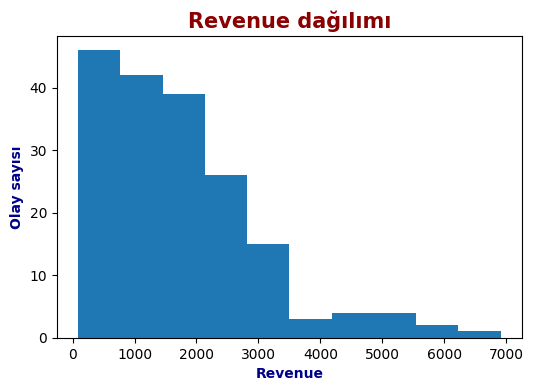

In [15]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,4), dpi = 100)

plt.hist(grouping_Ads.Revenue)
plt.title("Revenue dağılımı", fontdict = baslik_font)
plt.xlabel("Revenue", fontdict=eksen_font)
plt.ylabel("Olay sayısı", fontdict=eksen_font)
plt.show()

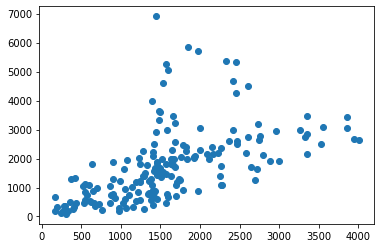

In [16]:
plt.scatter(grouping_Ads["Cost"], grouping_Ads["Revenue"])
plt.show()

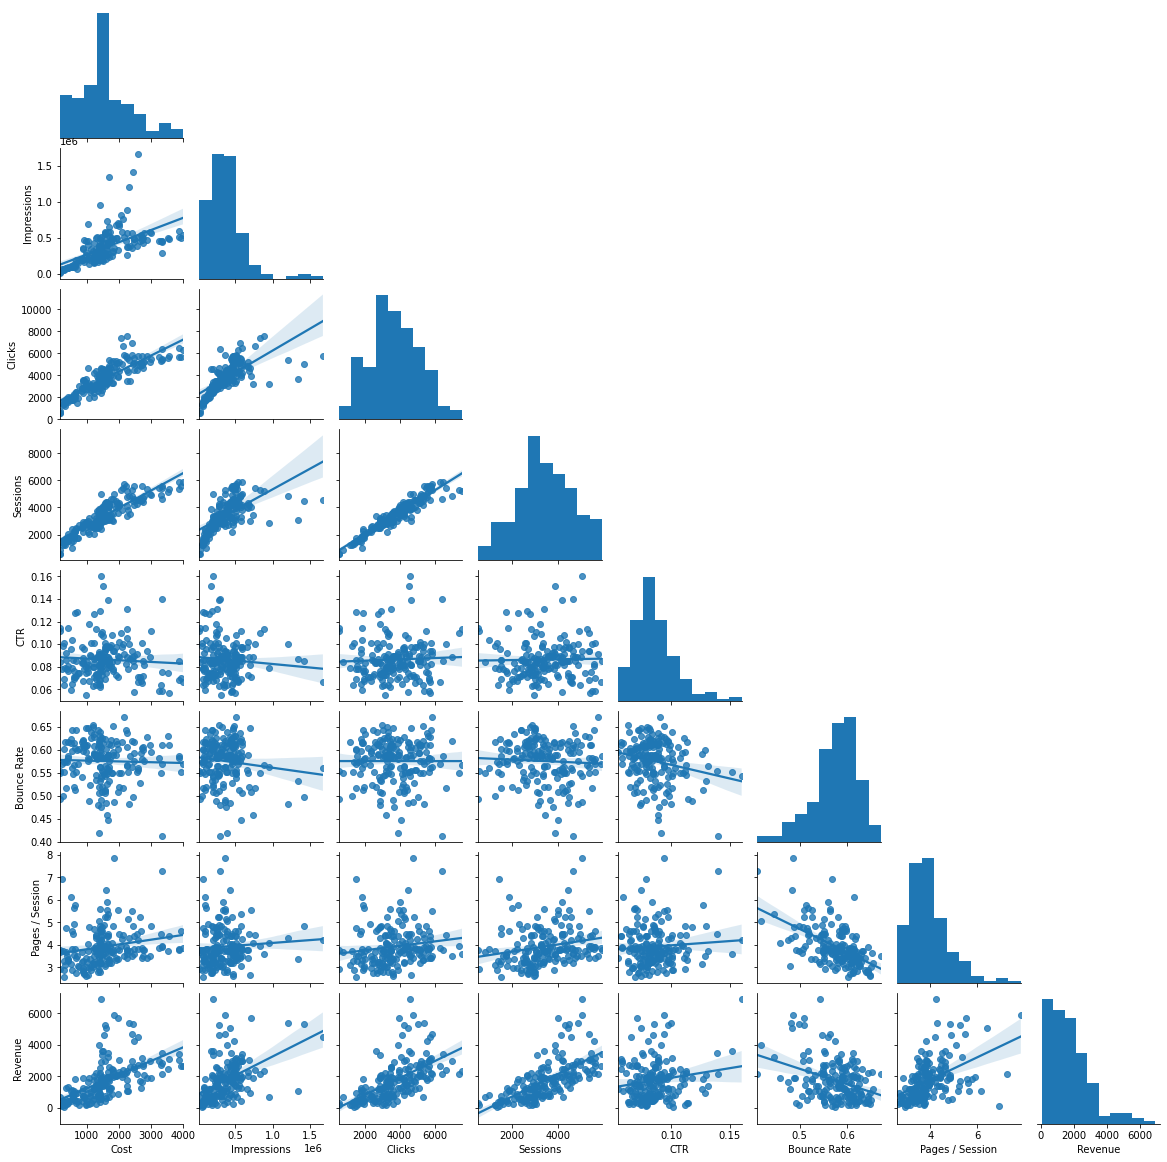

In [17]:
g=sns.pairplot(grouping_Ads[['Cost','Impressions','Clicks','Sessions',"CTR","Bounce Rate","Pages / Session","Revenue"]],corner=True, height=2,kind="reg",palette="husl")

In [18]:
Daily_Cost_kor = grouping_Ads.corr()
Daily_Cost_kor

,Cost,Impressions,CTR,CPC,Clicks,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,ROAS
Cost,1.000,0.574,-0.069,0.643,0.854,0.890,-0.030,0.200,0.674,0.561,0.267,-0.105
Impressions,0.574,1.000,-0.086,0.322,0.695,0.623,-0.120,0.070,0.465,0.461,0.245,-0.116
CTR,-0.069,-0.086,1.000,-0.054,0.046,0.021,-0.225,0.077,0.078,0.169,0.068,0.131
CPC,0.643,0.322,-0.054,1.000,0.386,0.458,-0.056,0.158,0.418,0.394,0.243,-0.072
Clicks,0.854,0.695,0.046,0.386,1.000,0.951,-0.000,0.159,0.664,0.591,0.209,-0.128
Sessions,0.890,0.623,0.021,0.458,0.951,1.000,-0.058,0.216,0.750,0.674,0.266,-0.087
Bounce Rate,-0.030,-0.120,-0.225,-0.056,-0.000,-0.058,1.000,-0.557,-0.325,-0.362,-0.332,-0.215
Pages / Session,0.200,0.070,0.077,0.158,0.159,0.216,-0.557,1.000,0.493,0.486,0.498,0.236
Transactions,0.674,0.465,0.078,0.418,0.664,0.750,-0.325,0.493,1.000,0.952,0.602,0.198
Revenue,0.561,0.461,0.169,0.394,0.591,0.674,-0.362,0.486,0.952,1.000,0.590,0.262


Text(0.5, 1.0, 'Korelasyon Matrisi (Daily_Cost_kor)')

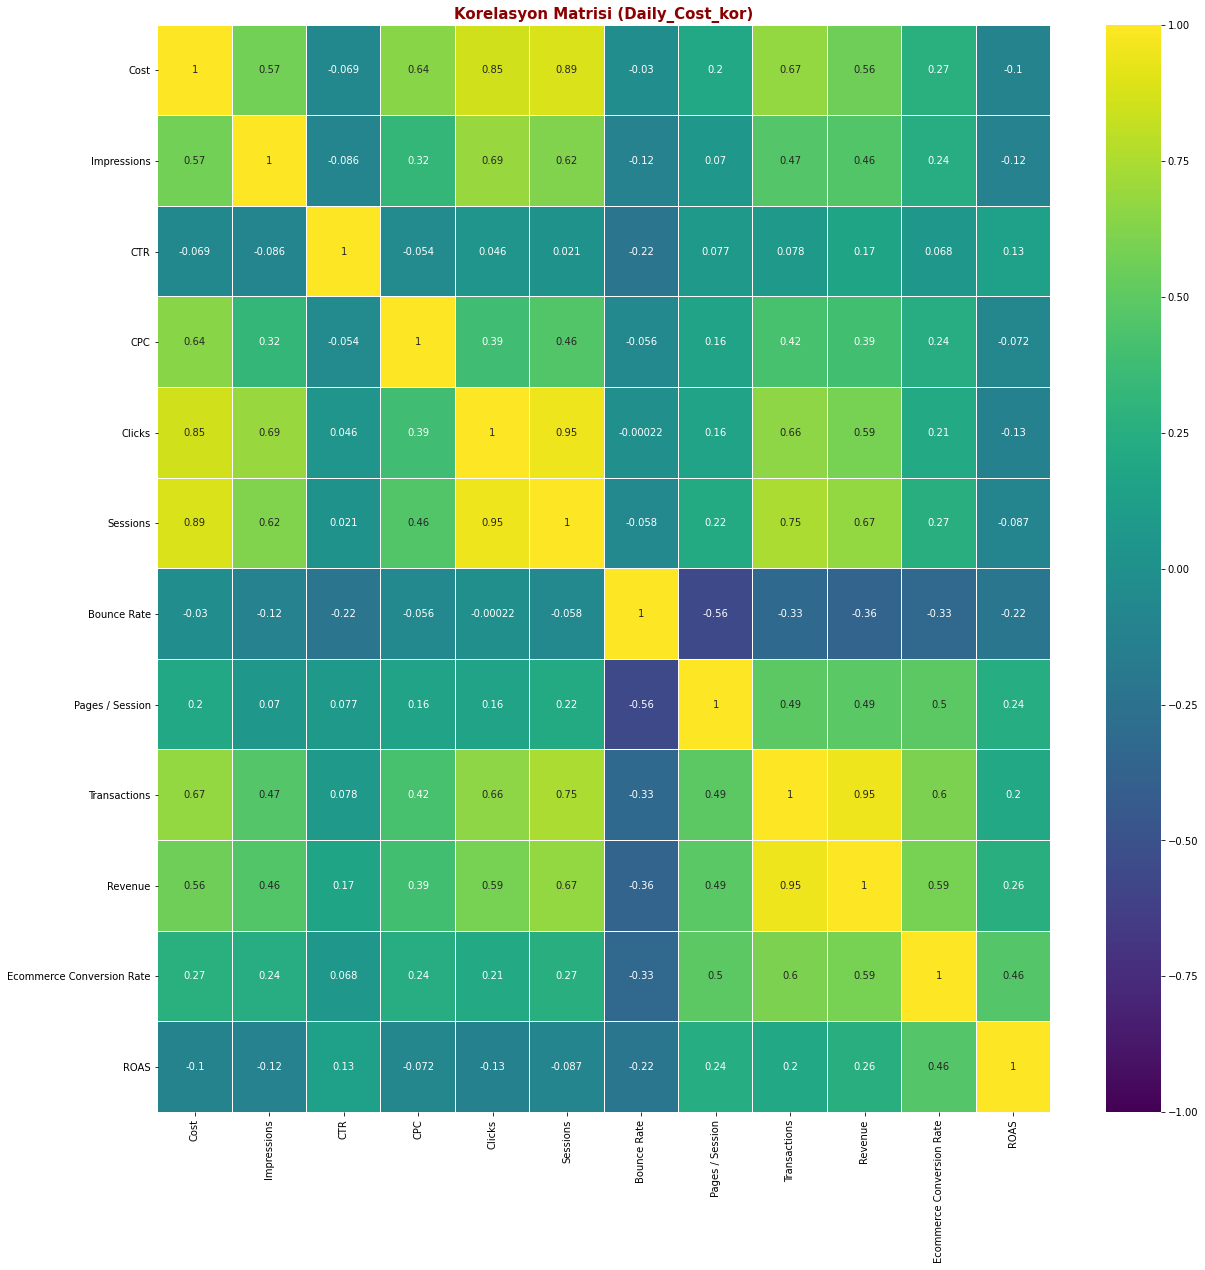

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(Daily_Cost_kor, annot=True, linewidths=.1, vmin=-1, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Daily_Cost_kor)", fontdict = baslik_font)

In [20]:
Y_rev = grouping_Ads['Revenue']
X_rev = grouping_Ads[['Cost','Sessions','Pages / Session']]

In [21]:
lrm_rev = linear_model.LinearRegression()
lrm_rev.fit(X_rev, Y_rev)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print('Değişkenler: \n', lrm_rev.coef_)
print('Sabit değer (bias): \n', lrm_rev.intercept_)

Değişkenler: 
 [-3.06355109e-01  8.22028459e-01  5.22382236e+02]
Sabit değer (bias): 
 -2626.1256918202284


In [23]:
X_rev = sm.add_constant(X_rev)
results = sm.OLS(Y_rev, X_rev).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     83.21
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.09e-33
Time:                        19:53:16   Log-Likelihood:                -1478.6
No. Observations:                 182   AIC:                             2965.
Df Residuals:                     178   BIC:                             2978.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2626.1257    319.915     -8.209      0.000   -3257.440   -1994.812
Cost               -0.3064      0.164     -1.873      0.063      -0.629       0.016
Sessions            0.8220      0.113      7.265      0.000       0.599       1.045
Pages / Session   522.3822     72.243      7.231      0.000     379.819     664.946
==============================================================================
Omnibus:                       38.946   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.144
Skew:                           0.968   Prob(JB):                     5.35e-19
Kurtosis:                       5.711   Cond. No.                     2.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
grouping_Ads["Order_YM"] = grouping_Ads["DateTime"].dt.strftime("%Y-%m")
grouping_Ads.head(5)


,DateTime,Cost,Impressions,CTR,CPC,Clicks,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,ROAS,Order_YM
0,2020-01-01,410.441,97295,0.114,0.278,1865,1834,0.617,3.337,4,330.850,0.001,56.704,2020-01
1,2020-01-02,338.745,63090,0.079,0.430,1192,1249,0.617,3.113,5,196.840,0.005,55.520,2020-01
2,2020-01-03,191.060,29331,0.114,0.419,537,532,0.492,3.758,4,313.720,0.004,130.123,2020-01
3,2020-01-04,164.521,18083,0.112,0.405,525,567,0.554,2.942,2,186.930,0.004,204.803,2020-01
4,2020-01-05,162.861,28702,0.084,0.331,773,826,0.550,3.687,6,678.700,0.006,1694.162,2020-01


In [25]:
grouping_Ads_Monthly = grouping_Ads.groupby("Order_YM").agg({"Cost":"sum",
                                                            "Impressions":"sum",
                                                            "CTR":"mean",
                                                            "CPC":"mean",
                                                            "Clicks":"sum",
                                                            "Sessions":"sum",
                                                            "Bounce Rate":"mean",
                                                            "Pages / Session":"mean",
                                                            "Transactions":"sum",
                                                            "Revenue":"sum",
                                                            "Ecommerce Conversion Rate":"mean",
                                                            "ROAS":"mean"}).reset_index()

grouping_Ads_Monthly.head(10)

,Order_YM,Cost,Impressions,CTR,CPC,Clicks,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,ROAS
0,2020-01,20038.268,6446504,0.085,0.403,74854,64114,0.586,3.388,381,21437.650,0.005,184.238
1,2020-02,29206.872,5653792,0.081,0.609,72937,70136,0.602,3.648,412,20256.240,0.005,87.434
2,2020-03,82913.795,14188311,0.076,0.743,153952,145817,0.592,3.841,1584,74037.650,0.010,127.125
3,2020-04,52551.199,10699312,0.090,0.696,113708,100703,0.583,4.191,912,51958.220,0.009,158.759
4,2020-05,54291.215,13381420,0.096,0.565,149453,130037,0.564,4.273,1252,69239.960,0.007,105.476
5,2020-06,48644.158,16451510,0.090,0.740,113513,111032,0.525,4.218,1348,81484.680,0.011,167.987


In [26]:
Y_rev_m = grouping_Ads_Monthly['Revenue']
X_rev_m = grouping_Ads_Monthly[['Cost','Sessions','Pages / Session']]

In [27]:
lrm_rev_m = linear_model.LinearRegression()
lrm_rev_m.fit(X_rev_m, Y_rev_m)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print('Değişkenler: \n', lrm_rev_m.coef_)
print('Sabit değer (bias): \n', lrm_rev_m.intercept_)

Değişkenler: 
 [-2.72162237e-01  7.42648044e-01  2.42662319e+04]
Sabit değer (bias): 
 -106136.25550833115


In [29]:
X_rev_m = sm.add_constant(X_rev_m)
results_m = sm.OLS(Y_rev_m, X_rev_m).fit()
results_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     4.920
Date:                Wed, 15 Jul 2020   Prob (F-statistic):              0.174
Time:                        19:53:23   Log-Likelihood:                -62.763
No. Observations:                   6   AIC:                             133.5
Df Residuals:                       2   BIC:                             132.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.061e+05   7.91e+04     -1.342      0.312   -4.46e+05    2.34e+05
Cost               -0.2722      0.990     -0.275      0.809      -4.530       3.985
Sessions            0.7426      0.747      0.994      0.425      -2.474       3.959
Pages / Session  2.427e+04   2.52e+04      0.962      0.438   -8.43e+04    1.33e+05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.093
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.653
Skew:                           0.780   Prob(JB):                        0.722
Kurtosis:                       2.582   Cond. No.                     1.65e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
Y_ro_m = grouping_Ads_Monthly['ROAS']
X_ro_m = grouping_Ads_Monthly[['Cost']]

In [31]:
lrm_ro_m = linear_model.LinearRegression()
lrm_ro_m.fit(X_ro_m, Y_ro_m)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print('Değişkenler: \n', lrm_ro_m.coef_)
print('Sabit değer (bias): \n', lrm_ro_m.intercept_)

Değişkenler: 
 [-0.00033667]
Sabit değer (bias): 
 154.64315604831884


In [33]:
X_ro_m = sm.add_constant(X_ro_m)
results_m = sm.OLS(Y_ro_m, X_ro_m).fit()
results_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ROAS   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.202
Method:                 Least Squares   F-statistic:                    0.1581
Date:                Wed, 15 Jul 2020   Prob (F-statistic):              0.711
Time:                        19:53:27   Log-Likelihood:                -29.667
No. Observations:                   6   AIC:                             63.33
Df Residuals:                       4   BIC:                             62.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        154.6432     44.007      3.514      0.025      32.461     276.826
Cost          -0.0003      0.001     -0.398      0.711      -0.003       0.002
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.748
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.675
Skew:                          -0.568   Prob(JB):                        0.714
Kurtosis:                       1.813   Cond. No.                     1.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
154.64315604831884/0.00033667

459331.5592369942

Kampanyalara göre gruplandırma

In [35]:
Daily_Cost1 = Ads_Performance_Raw.replace(to_replace ='.*GDN.*', value = 'GDN Campaigns', regex = True) 
Daily_Cost2 = Daily_Cost1.replace(to_replace ='.*Generic.*', value = 'Generic Campaigns', regex = True) 
Daily_Cost3 = Daily_Cost2.replace(to_replace ='.*Brand.*', value = 'Brand Campaigns', regex = True) 
Daily_Cost4 = Daily_Cost3.replace(to_replace ='.*Smart Shopping.*', value = 'Smart Shopping Campaigns', regex = True) 
Daily_Cost5 = Daily_Cost4.replace(to_replace ='.*DSA.*', value = 'DSA Campaigns', regex = True) 
Daily_Cost5.Campaign.value_counts()

Brand Campaigns                                  1317
Smart Shopping Campaigns                          888
Generic Campaigns                                 737
GDN Campaigns                                     565
DSA Campaigns                                     174
Franchise                                          28
9-GSP | Seçili Ürün %30 | Jan2020 |17-26Jan20      11
Name: Campaign, dtype: int64

In [36]:
Daily_Cost5

,index,Campaign,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,DateTime,ROAS
0,2,Smart Shopping Campaigns,20200330,898.959,104505,1191,0.011,0.755,1203,0.623,4.549,9,359.010,0.007,2020-03-30,39.936
1,5,Smart Shopping Campaigns,20200309,863.275,91594,1229,0.013,0.702,1243,0.656,3.246,16,934.750,0.013,2020-03-09,108.280
2,9,Smart Shopping Campaigns,20200518,830.420,54822,1433,0.026,0.579,967,0.363,7.920,7,380.990,0.007,2020-05-18,45.879
3,10,Smart Shopping Campaigns,20200518,806.980,73480,974,0.013,0.829,738,0.434,7.938,5,243.770,0.007,2020-05-18,30.208
4,11,Smart Shopping Campaigns,20200316,801.663,85535,1004,0.012,0.798,945,0.661,3.651,16,875.760,0.017,2020-03-16,109.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715,6556,GDN Campaigns,20200502,1.039,2752,9,0.003,0.115,5,0.400,4.200,0,0.000,0.000,2020-05-02,0.000
3716,6559,GDN Campaigns,20200122,1.028,301,4,0.013,0.257,4,0.250,4.500,0,0.000,0.000,2020-01-22,0.000
3717,6562,Brand Campaigns,20200209,1.020,17,4,0.235,0.255,3,1.000,1.000,0,0.000,0.000,2020-02-09,0.000
3718,6563,Smart Shopping Campaigns,20200105,1.020,3977,90,0.023,0.011,95,0.421,4.526,3,246.880,0.032,2020-01-05,24203.922


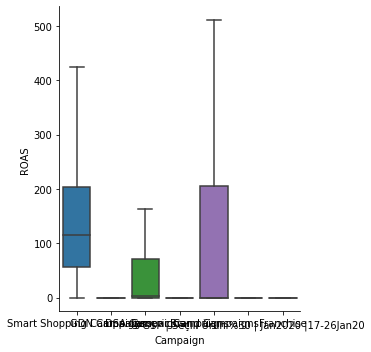

In [37]:
g = sns.catplot(x="Campaign", y = "ROAS",
                data= Daily_Cost5,
                kind = "box",
                sym=""
                )

# Show plot
plt.show()


GDN Performance

In [38]:
GDN_Performance = Daily_Cost5[(Daily_Cost5["Campaign"]=="GDN Campaigns")].reset_index()
GDN_Performance

,level_0,index,Campaign,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,DateTime,ROAS
0,5,13,GDN Campaigns,20200621,795.628,1448668,2458,0.002,0.324,1069,0.831,1.913,0,0.000,0.000,2020-06-21,0.000
1,26,51,GDN Campaigns,20200203,648.320,67215,276,0.004,2.349,270,0.593,3.663,0,0.000,0.000,2020-02-03,0.000
2,46,73,GDN Campaigns,20200622,570.964,1162714,1585,0.001,0.360,801,0.643,2.094,3,156.000,0.004,2020-06-22,27.322
3,87,123,GDN Campaigns,20200617,451.331,1173724,1446,0.001,0.312,756,0.783,1.499,0,0.000,0.000,2020-06-17,0.000
4,110,155,GDN Campaigns,20200623,388.146,879300,1254,0.001,0.310,605,0.664,1.850,0,0.000,0.000,2020-06-23,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,3697,6522,GDN Campaigns,20200225,1.111,2295,23,0.010,0.048,18,1.000,1.000,0,0.000,0.000,2020-02-25,0.000
561,3710,6549,GDN Campaigns,20200224,1.049,1295,16,0.012,0.066,10,0.800,1.300,0,0.000,0.000,2020-02-24,0.000
562,3711,6550,GDN Campaigns,20200223,1.046,2046,29,0.014,0.036,18,0.889,1.167,0,0.000,0.000,2020-02-23,0.000
563,3715,6556,GDN Campaigns,20200502,1.039,2752,9,0.003,0.115,5,0.400,4.200,0,0.000,0.000,2020-05-02,0.000


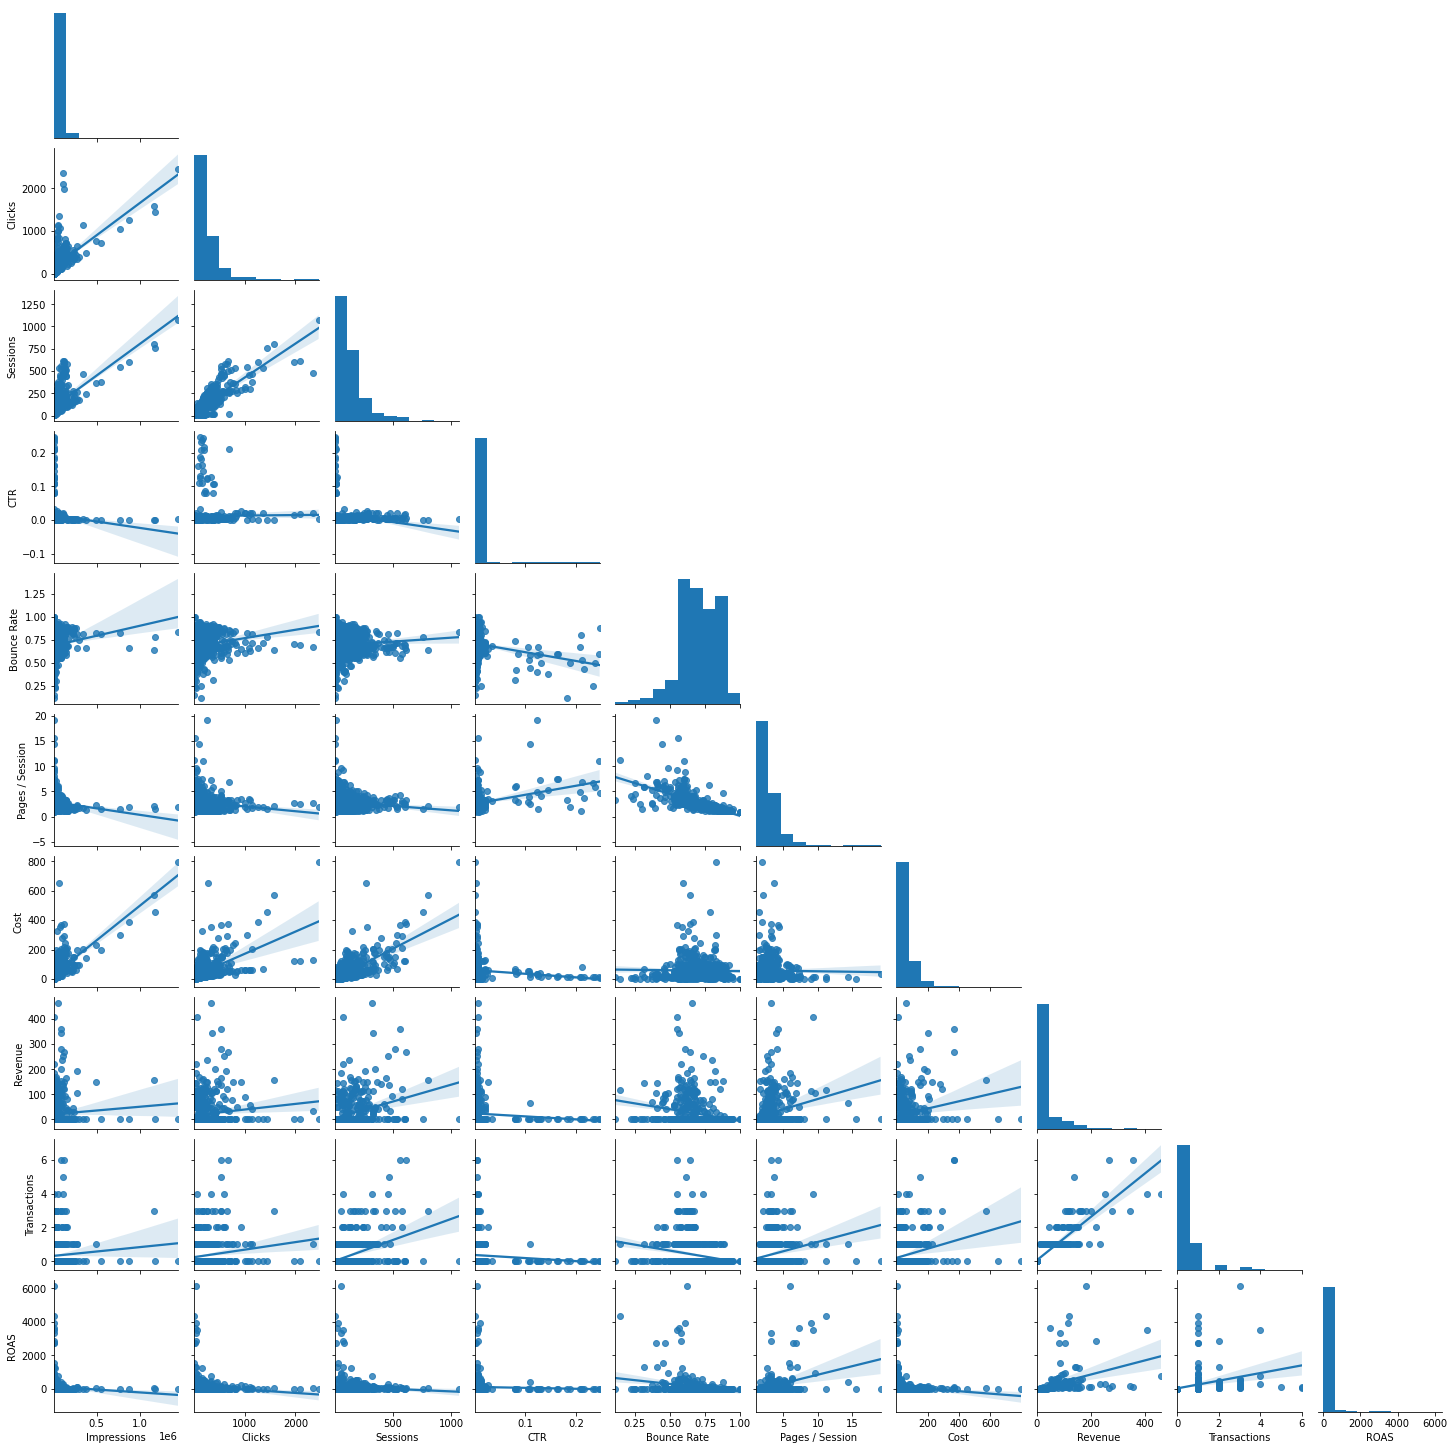

In [39]:
g=sns.pairplot(GDN_Performance[['Impressions','Clicks','Sessions',"CTR","Bounce Rate","Pages / Session",'Cost',"Revenue","Transactions","ROAS"]],corner=True, height=2,kind="reg",palette="husl")

**Generic_Campaigns_Performance**

In [40]:
Generic_Campaigns_Performance = Daily_Cost5[(Daily_Cost5["Campaign"]=="Generic Campaigns")].reset_index()
Generic_Campaigns_Performance

,level_0,index,Campaign,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,DateTime,ROAS
0,102,145,Generic Campaigns,20200327,399.970,1429,61,0.043,6.557,64,0.625,3.203,0,0.000,0.000,2020-03-27,0.000
1,114,160,Generic Campaigns,20200316,375.970,1393,62,0.045,6.064,48,0.708,2.146,0,0.000,0.000,2020-03-16,0.000
2,117,164,Generic Campaigns,20200326,370.610,1436,52,0.036,7.127,44,0.705,3.545,0,0.000,0.000,2020-03-26,0.000
3,170,225,Generic Campaigns,20200408,315.660,1684,90,0.053,3.507,85,0.647,2.471,0,0.000,0.000,2020-04-08,0.000
4,221,290,Generic Campaigns,20200409,285.720,1241,79,0.064,3.617,65,0.692,2.354,0,0.000,0.000,2020-04-09,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,3688,6509,Generic Campaigns,20200301,1.170,11,2,0.182,0.585,2,0.500,3.500,0,0.000,0.000,2020-03-01,0.000
733,3694,6517,Generic Campaigns,20200522,1.130,48,4,0.083,0.282,5,0.400,2.400,0,0.000,0.000,2020-05-22,0.000
734,3707,6543,Generic Campaigns,20200131,1.060,71,3,0.042,0.353,2,0.000,3.500,0,0.000,0.000,2020-01-31,0.000
735,3708,6544,Generic Campaigns,20200520,1.060,71,2,0.028,0.530,5,0.400,8.400,0,0.000,0.000,2020-05-20,0.000


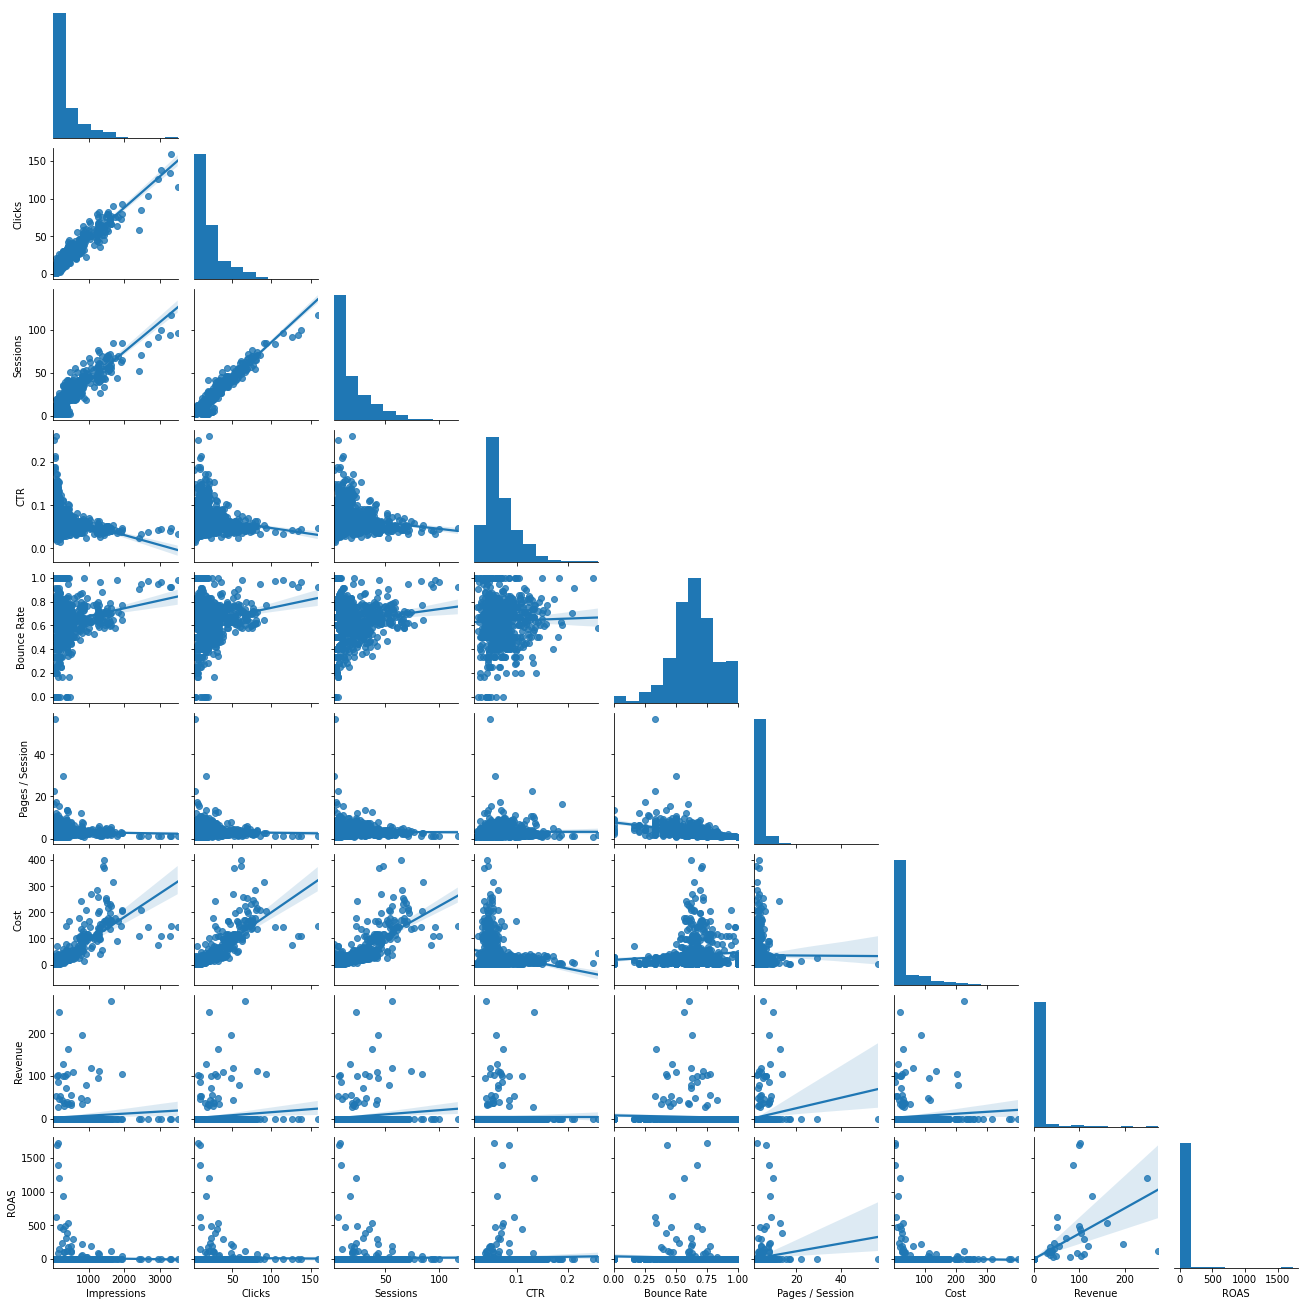

In [41]:
g=sns.pairplot(Generic_Campaigns_Performance[['Impressions','Clicks','Sessions',"CTR","Bounce Rate","Pages / Session",'Cost',"Revenue","ROAS"]],corner=True, height=2,kind="reg",palette="husl")

In [42]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


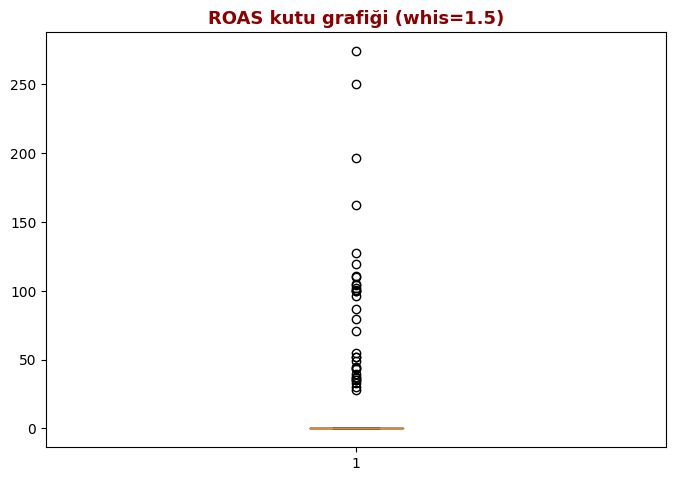

In [43]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(Generic_Campaigns_Performance["Revenue"], )
plt.title("ROAS kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

In [46]:
from scipy.stats import zscore

z_scores = zscore(Generic_Campaigns_Performance["Revenue"])
for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Eşik değeri: 1
Aykırı değerlerin sayısı: 33
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 22
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 18
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 15
------


In [47]:
Generic_Campaigns_Performance.describe()

,level_0,index,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,ROAS
count,737.000,737.000,737.000,737.000,737.000,737.000,737.000,737.000,737.000,737.000,737.000,737.000,737.000,737.000,737.000
mean,2307.934,4240.735,20200387.258,35.684,379.554,20.745,0.068,1.413,18.688,0.636,3.230,0.053,3.946,0.003,17.510
std,933.241,1688.571,169.838,53.754,473.837,20.706,0.032,1.078,18.064,0.191,3.188,0.268,22.190,0.015,127.648
min,102.000,145.000,20200101.000,1.050,11.000,1.000,0.016,0.282,2.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,1703.000,3364.000,20200222.000,5.880,101.000,7.000,0.046,0.820,6.000,0.500,1.667,0.000,0.000,0.000,0.000
50%,2405.000,4595.000,20200412.000,17.010,181.000,14.000,0.060,1.051,12.000,0.652,2.471,0.000,0.000,0.000,0.000
75%,3131.000,5662.000,20200517.000,32.550,432.000,27.000,0.082,1.708,26.000,0.750,3.800,0.000,0.000,0.000,0.000
max,3709.000,6546.000,20200630.000,399.970,3504.000,159.000,0.259,11.545,117.000,1.000,56.667,3.000,274.320,0.222,1730.560


In [48]:
Generic_Campaigns_Performance.sort_values(by=["Revenue"],ascending=False).head(30)

,level_0,index,Campaign,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,DateTime,ROAS
12,380,490,Generic Campaigns,20200412,225.310,1624,66,0.041,3.414,56,0.607,5.339,3,274.320,0.054,2020-04-12,121.752
318,2226,4302,Generic Campaigns,20200630,20.740,157,21,0.134,0.988,23,0.565,9.739,2,249.930,0.087,2020-06-30,1205.063
94,939,1543,Generic Campaigns,20200308,89.030,812,49,0.060,1.817,43,0.628,7.674,3,196.320,0.070,2020-03-08,220.510
218,1801,3557,Generic Campaigns,20200604,29.930,433,32,0.074,0.935,38,0.342,12.553,1,162.210,0.026,2020-06-04,541.965
404,2628,4953,Generic Campaigns,20200619,13.590,280,17,0.061,0.799,17,0.471,8.059,1,127.470,0.059,2020-06-19,937.969
113,1177,2082,Generic Campaigns,20200306,63.550,1072,51,0.048,1.246,56,0.625,4.196,1,119.400,0.018,2020-03-06,187.884
48,660,992,Generic Campaigns,20200215,136.390,1287,82,0.064,1.663,74,0.716,3.405,1,110.460,0.014,2020-02-15,80.988
155,1569,3107,Generic Campaigns,20200429,37.180,569,38,0.067,0.978,42,0.500,4.429,1,109.980,0.024,2020-04-29,295.804
251,1921,3781,Generic Campaigns,20200622,27.100,405,28,0.069,0.968,31,0.419,13.581,1,105.000,0.032,2020-06-22,387.454
17,428,562,Generic Campaigns,20200413,205.060,1944,93,0.048,2.205,84,0.774,2.786,1,103.950,0.012,2020-04-13,50.692


Brand_Campaigns_Performance

In [106]:
Brand_Campaigns_Performance = Daily_Cost5[(Daily_Cost5["Campaign"]=="Brand Campaigns")].reset_index()
Brand_Campaigns_Performance

,level_0,index,Campaign,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,DateTime,ROAS
0,465,615,Brand Campaigns,20200630,194.620,4138,1427,0.345,0.136,1629,0.229,8.486,40,3150.530,0.025,2020-06-30,1618.811
1,576,817,Brand Campaigns,20200518,160.370,1081,300,0.278,0.535,255,0.231,8.208,5,193.260,0.020,2020-05-18,120.509
2,600,861,Brand Campaigns,20200518,154.260,1245,438,0.352,0.352,388,0.232,11.229,2,101.060,0.005,2020-05-18,65.513
3,639,942,Brand Campaigns,20200621,143.220,573,94,0.164,1.524,111,0.423,5.667,6,480.480,0.054,2020-06-21,335.484
4,675,1021,Brand Campaigns,20200628,132.600,495,69,0.139,1.922,68,0.221,6.088,0,0.000,0.000,2020-06-28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,3705,6538,Brand Campaigns,20200327,1.080,52,4,0.077,0.270,7,0.429,2.286,0,0.000,0.000,2020-03-27,0.000
1313,3706,6541,Brand Campaigns,20200430,1.070,4,2,0.500,0.535,2,0.500,1.000,0,0.000,0.000,2020-04-30,0.000
1314,3712,6551,Brand Campaigns,20200223,1.040,23,7,0.304,0.149,7,1.000,1.000,0,0.000,0.000,2020-02-23,0.000
1315,3713,6553,Brand Campaigns,20200401,1.040,3,2,0.667,0.520,2,0.500,27.000,0,0.000,0.000,2020-04-01,0.000


In [107]:
Brand_Campaigns_Performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   level_0                    1317 non-null   int64         
 1   index                      1317 non-null   int64         
 2   Campaign                   1317 non-null   object        
 3   Date                       1317 non-null   int64         
 4   Cost                       1317 non-null   float64       
 5   Impressions                1317 non-null   int64         
 6   Clicks                     1317 non-null   int64         
 7   CTR                        1317 non-null   float64       
 8   CPC                        1317 non-null   float64       
 9   Sessions                   1317 non-null   int64         
 10  Bounce Rate                1317 non-null   float64       
 11  Pages / Session            1317 non-null   float64       
 12  Transa

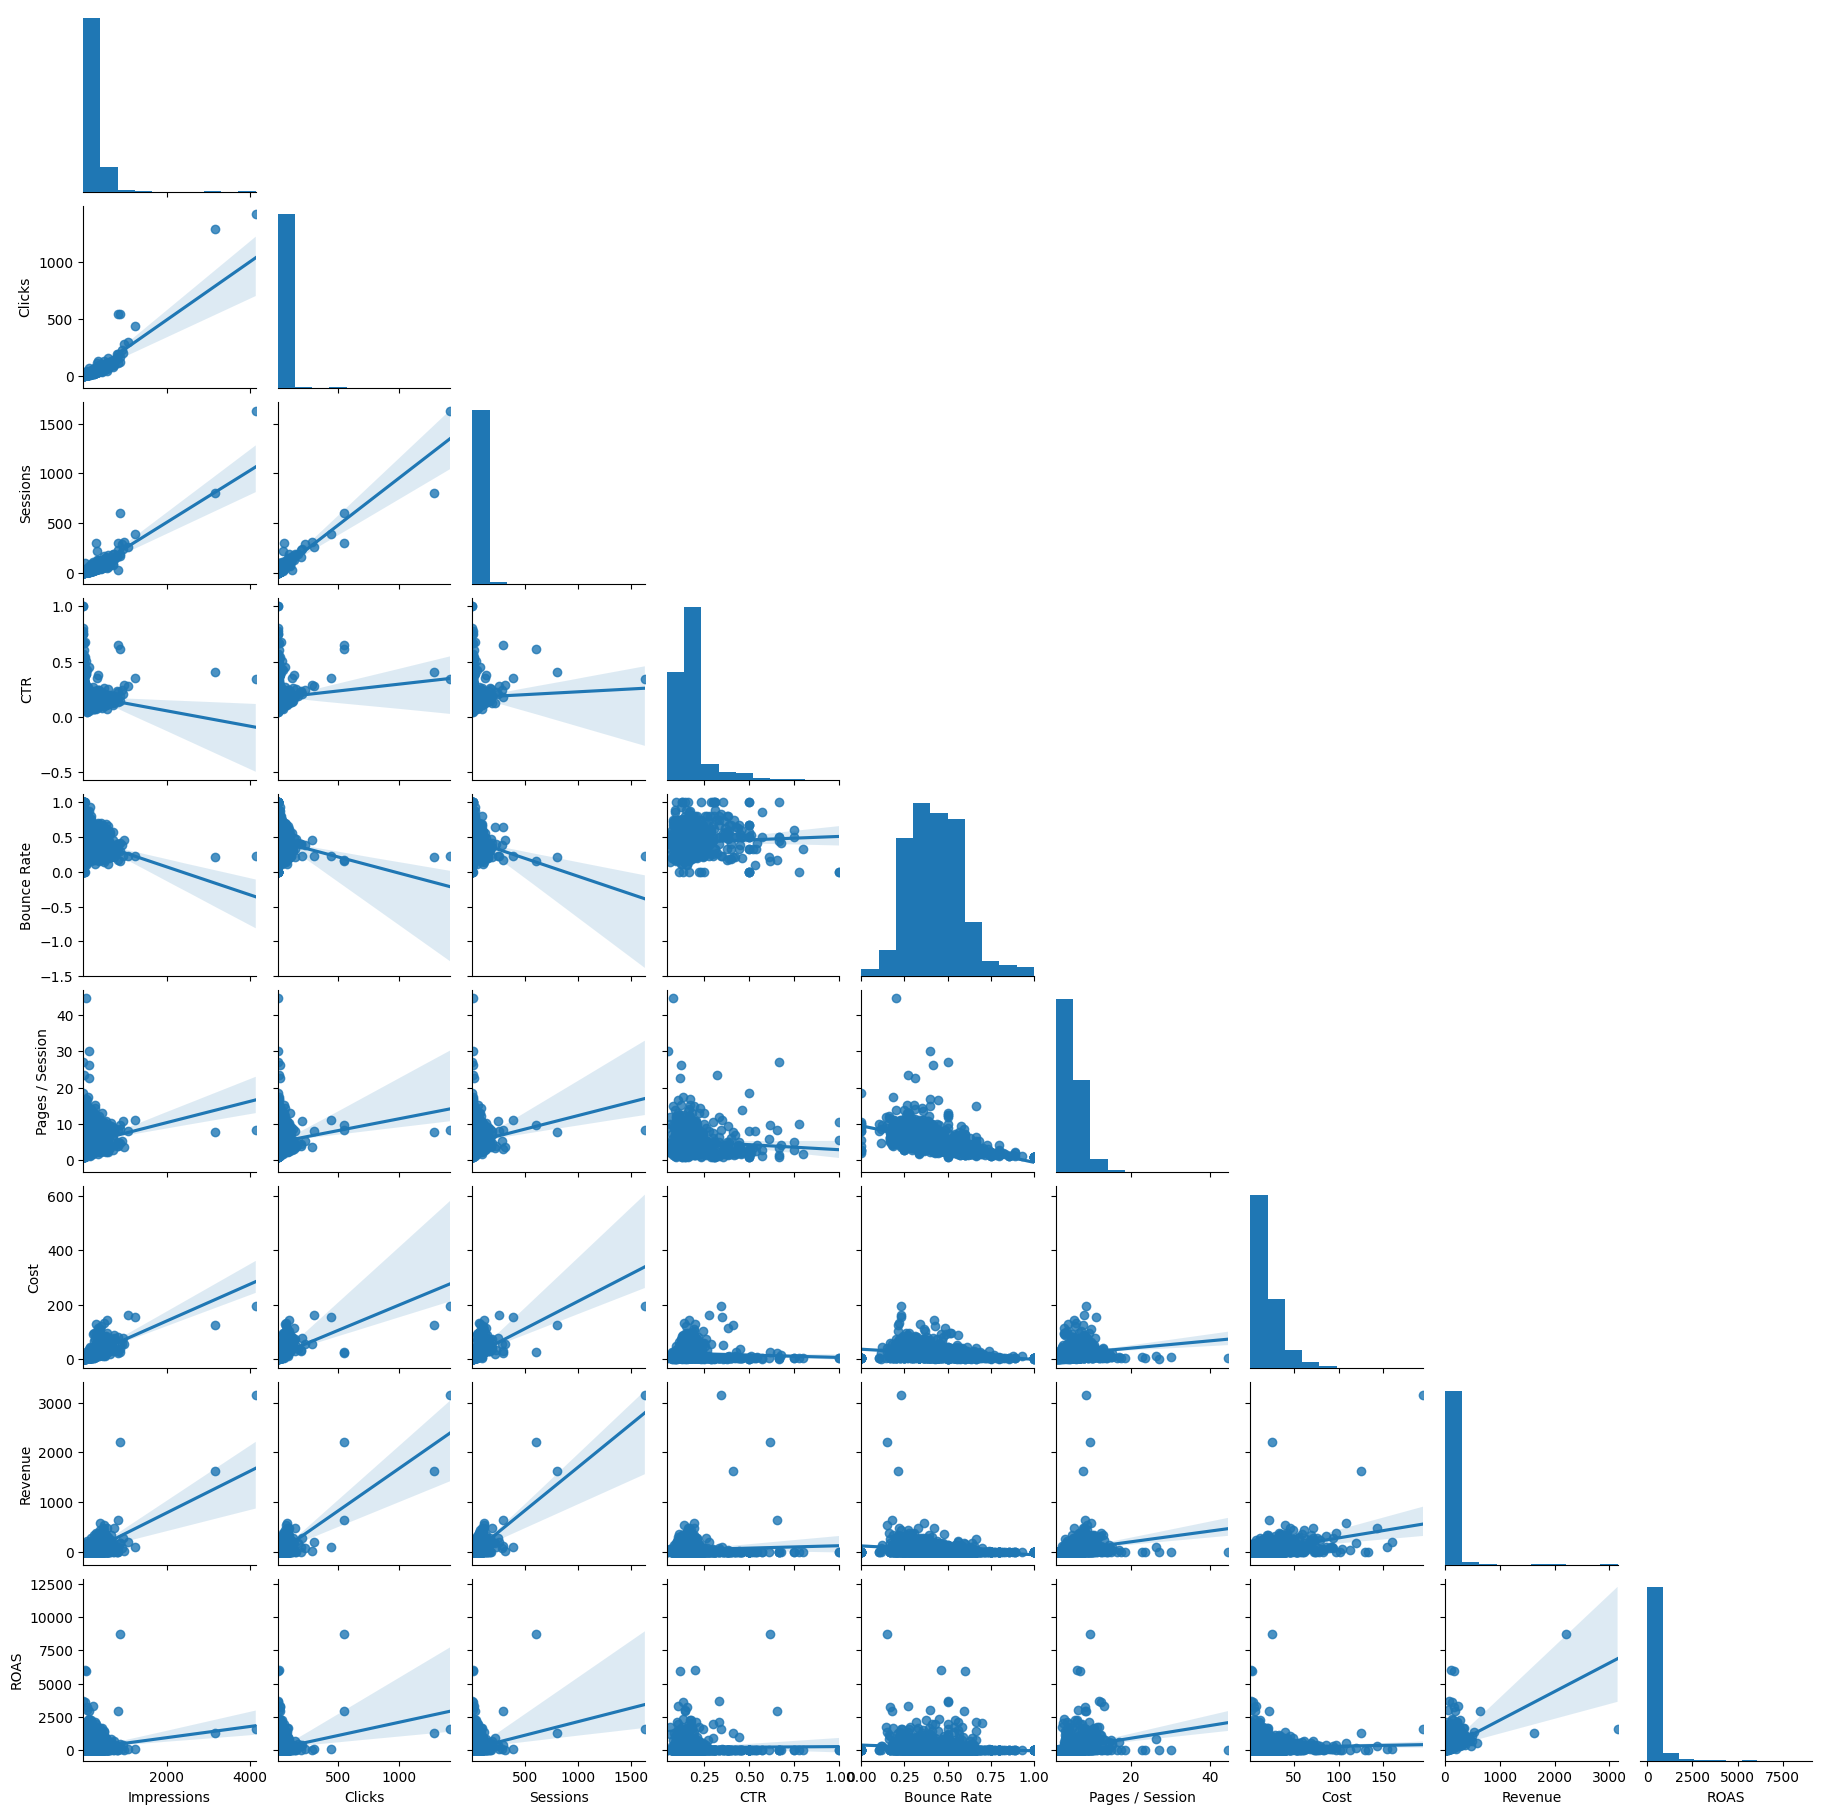

In [108]:
g=sns.pairplot(Brand_Campaigns_Performance[['Impressions','Clicks','Sessions',"CTR","Bounce Rate","Pages / Session",'Cost',"Revenue","ROAS"]],corner=True, height=2,kind="reg",palette="husl")

In [111]:
Y = Brand_Campaigns_Performance['Revenue']
X = Brand_Campaigns_Performance[['Cost']]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1053
Test kümesindeki gözlem sayısı   : 264


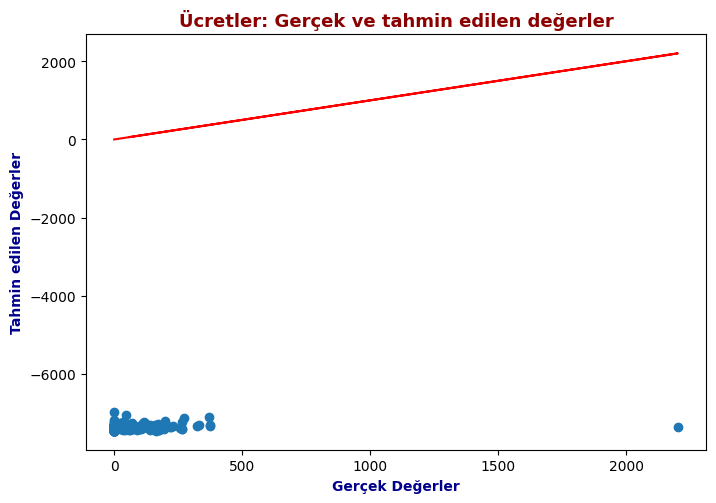

Ortalama Mutlak Hata (MSE)        : 7432.352624148779
Ortalama Kare Hata (MSE)          : 55263573.57146198
Kök Ortalama Kare Hata (RMSE)     : 7433.947374811177
Ortalama Mutlak Yüzde Hata (MAPE) : inf


In [113]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)

plt.figure(dpi = 100)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [52]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-123.27985335    3.8299903   168.97881691]
Sabit değer (bias): 
 3.152421767556362


In [54]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     145.9
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.41e-81
Time:                        19:54:39   Log-Likelihood:                -8158.6
No. Observations:                1317   AIC:                         1.633e+04
Df Residuals:                    1313   BIC:                         1.635e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1524      9.173      0.344      0.731     -14.843      21.148
CPC         -123.2799     13.129     -9.390      0.000    -149.037     -97.523
Cost           3.8300      0.185     20.717      0.000       3.467       4.193
CTR          168.9788     34.328      4.922      0.000     101.635     236.322
==============================================================================
Omnibus:                     2172.474   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1897395.968
Skew:                          10.350   Prob(JB):                         0.00
Kurtosis:                     187.792   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Create column for year and month
Brand_Campaigns_Performance["Order_YM"] = Brand_Campaigns_Performance["DateTime"].dt.strftime("%Y-%m")
Brand_Campaigns_Performance.head(5)


,level_0,index,Campaign,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,DateTime,ROAS,Order_YM
0,465,615,Brand Campaigns,20200630,194.620,4138,1427,0.345,0.136,1629,0.229,8.486,40,3150.530,0.025,2020-06-30,1618.811,2020-06
1,576,817,Brand Campaigns,20200518,160.370,1081,300,0.278,0.535,255,0.231,8.208,5,193.260,0.020,2020-05-18,120.509,2020-05
2,600,861,Brand Campaigns,20200518,154.260,1245,438,0.352,0.352,388,0.232,11.229,2,101.060,0.005,2020-05-18,65.513,2020-05
3,639,942,Brand Campaigns,20200621,143.220,573,94,0.164,1.524,111,0.423,5.667,6,480.480,0.054,2020-06-21,335.484,2020-06
4,675,1021,Brand Campaigns,20200628,132.600,495,69,0.139,1.922,68,0.221,6.088,0,0.000,0.000,2020-06-28,0.000,2020-06


In [56]:
Brand_Campaigns_Performance_M = Brand_Campaigns_Performance.groupby("Order_YM").agg({"Cost":"sum",
                                                            "Impressions":"sum",
                                                            "CTR":"mean",
                                                            "CPC":"mean",
                                                            "Clicks":"sum",
                                                            "Sessions":"sum",
                                                            "Bounce Rate":"mean",
                                                            "Pages / Session":"mean",
                                                            "Transactions":"sum",
                                                            "Revenue":"sum",
                                                            "Ecommerce Conversion Rate":"mean",
                                                            "ROAS":"mean"}).reset_index()
Brand_Campaigns_Performance_M.head()

,Order_YM,Cost,Impressions,CTR,CPC,Clicks,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,ROAS
0,2020-01,1931.500,34338,0.171,0.354,5438,6033,0.449,4.232,52,3387.120,0.006,142.584
1,2020-02,3653.660,44104,0.166,0.571,6388,6850,0.450,5.176,58,3819.980,0.007,96.246
2,2020-03,3232.090,50600,0.157,0.436,7138,8876,0.448,5.060,160,9087.050,0.016,241.938
3,2020-04,3552.520,39426,0.190,0.576,6215,7258,0.438,5.535,111,8728.420,0.016,257.337
4,2020-05,5720.410,73887,0.191,0.475,12591,14611,0.410,5.590,164,10462.460,0.009,164.795


In [96]:
Brand_Campaigns_Performance_M

,Order_YM,Cost,Impressions,CTR,CPC,Clicks,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,ROAS,ROAS_N
0,2020-01,1931.500,34338,0.171,0.354,5438,6033,0.449,4.232,52,3387.120,0.006,142.584,175.362
1,2020-02,3653.660,44104,0.166,0.571,6388,6850,0.450,5.176,58,3819.980,0.007,96.246,104.552
2,2020-03,3232.090,50600,0.157,0.436,7138,8876,0.448,5.060,160,9087.050,0.016,241.938,281.151
3,2020-04,3552.520,39426,0.190,0.576,6215,7258,0.438,5.535,111,8728.420,0.016,257.337,245.697
4,2020-05,5720.410,73887,0.191,0.475,12591,14611,0.410,5.590,164,10462.460,0.009,164.795,182.897
5,2020-06,7649.130,71091,0.186,0.694,13623,15339,0.383,5.594,318,21876.680,0.017,255.279,286.002


In [58]:
Brand_Campaigns_Performance_M["ROAS_N"]=Brand_Campaigns_Performance_M["Revenue"]*100/Brand_Campaigns_Performance_M["Cost"]
Brand_Campaigns_Performance_M

,Order_YM,Cost,Impressions,CTR,CPC,Clicks,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,ROAS,ROAS_N
0,2020-01,1931.500,34338,0.171,0.354,5438,6033,0.449,4.232,52,3387.120,0.006,142.584,175.362
1,2020-02,3653.660,44104,0.166,0.571,6388,6850,0.450,5.176,58,3819.980,0.007,96.246,104.552
2,2020-03,3232.090,50600,0.157,0.436,7138,8876,0.448,5.060,160,9087.050,0.016,241.938,281.151
3,2020-04,3552.520,39426,0.190,0.576,6215,7258,0.438,5.535,111,8728.420,0.016,257.337,245.697
4,2020-05,5720.410,73887,0.191,0.475,12591,14611,0.410,5.590,164,10462.460,0.009,164.795,182.897
5,2020-06,7649.130,71091,0.186,0.694,13623,15339,0.383,5.594,318,21876.680,0.017,255.279,286.002


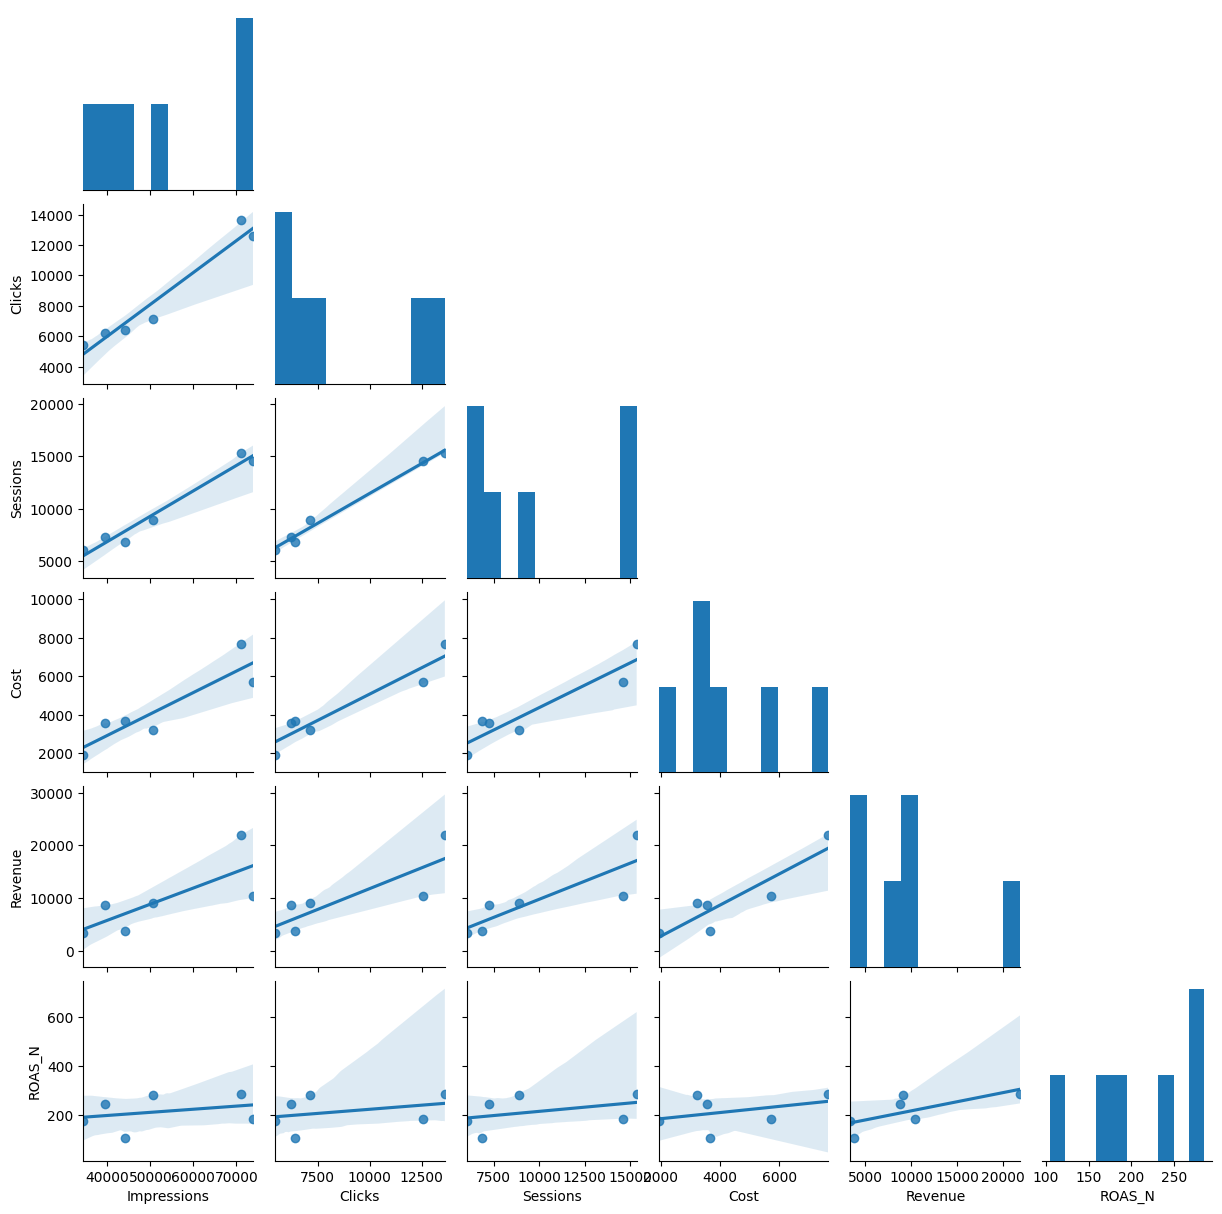

In [59]:
g=sns.pairplot(Brand_Campaigns_Performance_M[['Impressions','Clicks','Sessions','Cost',"Revenue","ROAS_N"]],corner=True, height=2,kind="reg",palette="husl")

In [114]:
Y = Brand_Campaigns_Performance_M['Revenue']
X = Brand_Campaigns_Performance_M[['Cost']]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 4
Test kümesindeki gözlem sayısı   : 2


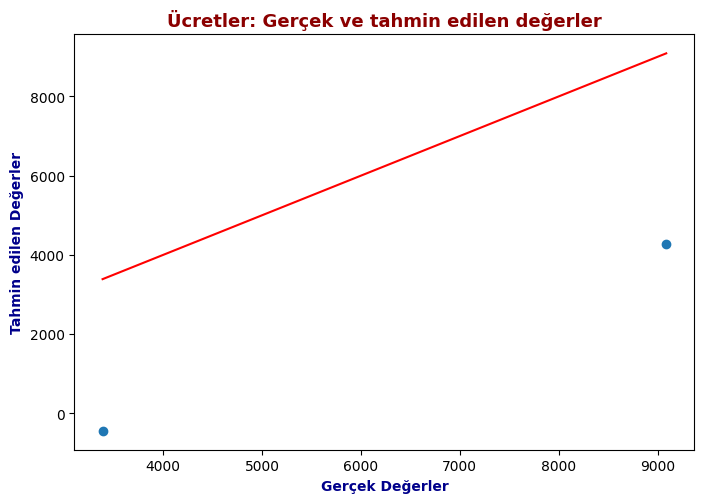

Ortalama Mutlak Hata (MSE)        : 4318.01810005301
Ortalama Kare Hata (MSE)          : 18884223.83504748
Kök Ortalama Kare Hata (RMSE)     : 4345.598213715515
Ortalama Mutlak Yüzde Hata (MAPE) : 82.97472106338495


In [116]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)

plt.figure(dpi = 100)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [61]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [2.95745232]
Sabit değer (bias): 
 -3126.8453378960494


In [63]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     17.82
Date:                Wed, 15 Jul 2020   Prob (F-statistic):             0.0135
Time:                        19:55:08   Log-Likelihood:                -55.737
No. Observations:                   6   AIC:                             115.5
Df Residuals:                       4   BIC:                             115.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3126.8453   3278.359     -0.954      0.394   -1.22e+04    5975.338
Cost           2.9575      0.701      4.221      0.013       1.012       4.903
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.924
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.846
Skew:                          -0.549   Prob(JB):                        0.655
Kurtosis:                       1.524   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
costt = 4000
2.95745232*costt -3126.8453378960494


8702.96394210395

Smart_Shopping_Campaigns

In [65]:
Smart_Shopping_Campaigns = Daily_Cost5[(Daily_Cost5["Campaign"]=="Smart Shopping Campaigns")].reset_index()
Smart_Shopping_Campaigns

,level_0,index,Campaign,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,DateTime,ROAS
0,0,2,Smart Shopping Campaigns,20200330,898.959,104505,1191,0.011,0.755,1203,0.623,4.549,9,359.010,0.007,2020-03-30,39.936
1,1,5,Smart Shopping Campaigns,20200309,863.275,91594,1229,0.013,0.702,1243,0.656,3.246,16,934.750,0.013,2020-03-09,108.280
2,2,9,Smart Shopping Campaigns,20200518,830.420,54822,1433,0.026,0.579,967,0.363,7.920,7,380.990,0.007,2020-05-18,45.879
3,3,10,Smart Shopping Campaigns,20200518,806.980,73480,974,0.013,0.829,738,0.434,7.938,5,243.770,0.007,2020-05-18,30.208
4,4,11,Smart Shopping Campaigns,20200316,801.663,85535,1004,0.012,0.798,945,0.661,3.651,16,875.760,0.017,2020-03-16,109.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,3701,6533,Smart Shopping Campaigns,20200105,1.090,1541,48,0.031,0.023,52,0.808,1.615,0,0.000,0.000,2020-01-05,0.000
884,3702,6534,Smart Shopping Campaigns,20200104,1.090,4130,87,0.021,0.013,90,0.678,2.144,0,0.000,0.000,2020-01-04,0.000
885,3714,6555,Smart Shopping Campaigns,20200103,1.040,496,16,0.032,0.065,21,0.810,3.190,0,0.000,0.000,2020-01-03,0.000
886,3718,6563,Smart Shopping Campaigns,20200105,1.020,3977,90,0.023,0.011,95,0.421,4.526,3,246.880,0.032,2020-01-05,24203.922


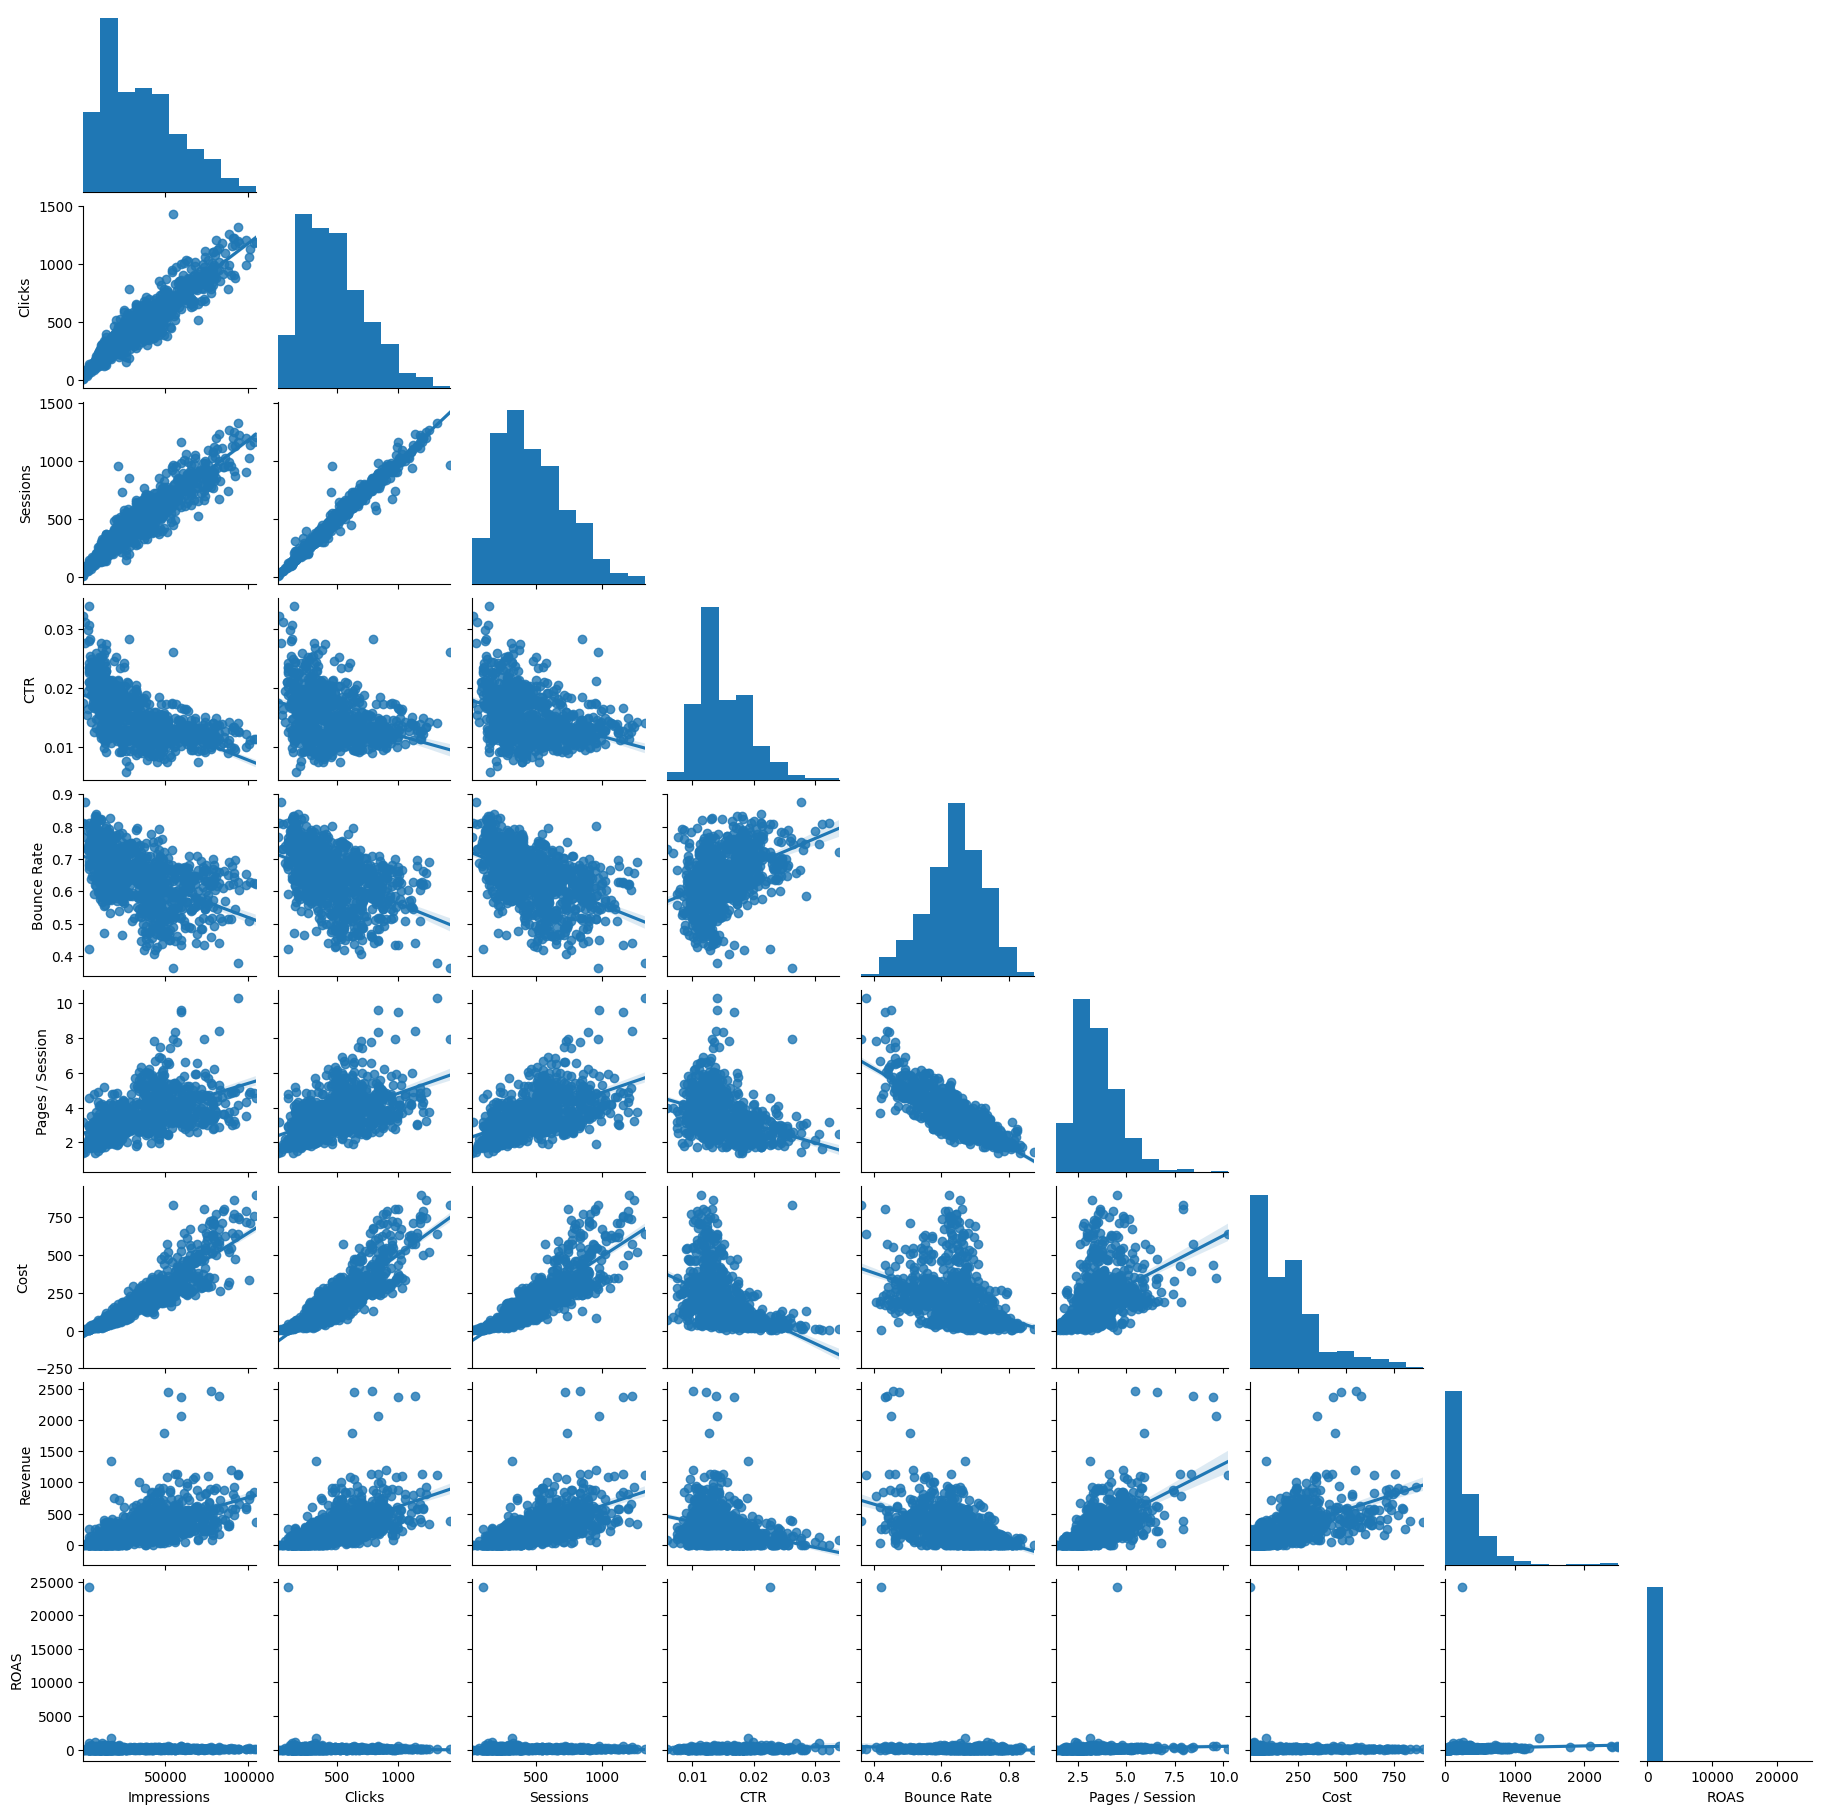

In [66]:
g=sns.pairplot(Smart_Shopping_Campaigns[['Impressions','Clicks','Sessions',"CTR","Bounce Rate","Pages / Session",'Cost',"Revenue","ROAS"]],corner=True, height=2,kind="reg",palette="husl")

In [67]:
Y = Smart_Shopping_Campaigns['Revenue']
X = Smart_Shopping_Campaigns[['Cost','Impressions','Clicks','Sessions']]

In [68]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 6.66267813e-01 -1.11605962e-03 -1.34766569e+00  1.74677241e+00]
Sabit değer (bias): 
 -26.373833064324913


In [70]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     161.0
Date:                Wed, 15 Jul 2020   Prob (F-statistic):          1.80e-103
Time:                        19:57:18   Log-Likelihood:                -6054.2
No. Observations:                 888   AIC:                         1.212e+04
Df Residuals:                     883   BIC:                         1.214e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -26.3738     17.165     -1.536      0.125     -60.063       7.316
Cost            0.6663      0.111      5.980      0.000       0.448       0.885
Impressions    -0.0011      0.001     -0.973      0.331      -0.003       0.001
Clicks         -1.3477      0.187     -7.211      0.000      -1.714      -0.981
Sessions        1.7468      0.180      9.712      0.000       1.394       2.100
==============================================================================
Omnibus:                      598.701   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13226.697
Skew:                           2.726   Prob(JB):                         0.00
Kurtosis:                      21.104   Cond. No.                     9.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# Create column for year and month
Smart_Shopping_Campaigns["Order_YM"] = Smart_Shopping_Campaigns["DateTime"].dt.strftime("%Y-%m")
Smart_Shopping_Campaigns.head(5)

,level_0,index,Campaign,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,DateTime,ROAS,Order_YM
0,0,2,Smart Shopping Campaigns,20200330,898.959,104505,1191,0.011,0.755,1203,0.623,4.549,9,359.010,0.007,2020-03-30,39.936,2020-03
1,1,5,Smart Shopping Campaigns,20200309,863.275,91594,1229,0.013,0.702,1243,0.656,3.246,16,934.750,0.013,2020-03-09,108.280,2020-03
2,2,9,Smart Shopping Campaigns,20200518,830.420,54822,1433,0.026,0.579,967,0.363,7.920,7,380.990,0.007,2020-05-18,45.879,2020-05
3,3,10,Smart Shopping Campaigns,20200518,806.980,73480,974,0.013,0.829,738,0.434,7.938,5,243.770,0.007,2020-05-18,30.208,2020-05
4,4,11,Smart Shopping Campaigns,20200316,801.663,85535,1004,0.012,0.798,945,0.661,3.651,16,875.760,0.017,2020-03-16,109.243,2020-03


In [72]:
Smart_Shopping_Campaigns_M = Brand_Campaigns_Performance.groupby("Order_YM").agg({"Cost":"sum",
                                                            "Impressions":"sum",
                                                            "CTR":"mean",
                                                            "CPC":"mean",
                                                            "Clicks":"sum",
                                                            "Sessions":"sum",
                                                            "Bounce Rate":"mean",
                                                            "Pages / Session":"mean",
                                                            "Transactions":"sum",
                                                            "Revenue":"sum",
                                                            "Ecommerce Conversion Rate":"mean",
                                                            "ROAS":"mean"}).reset_index()
Smart_Shopping_Campaigns_M.head()

,Order_YM,Cost,Impressions,CTR,CPC,Clicks,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,ROAS
0,2020-01,1931.500,34338,0.171,0.354,5438,6033,0.449,4.232,52,3387.120,0.006,142.584
1,2020-02,3653.660,44104,0.166,0.571,6388,6850,0.450,5.176,58,3819.980,0.007,96.246
2,2020-03,3232.090,50600,0.157,0.436,7138,8876,0.448,5.060,160,9087.050,0.016,241.938
3,2020-04,3552.520,39426,0.190,0.576,6215,7258,0.438,5.535,111,8728.420,0.016,257.337
4,2020-05,5720.410,73887,0.191,0.475,12591,14611,0.410,5.590,164,10462.460,0.009,164.795


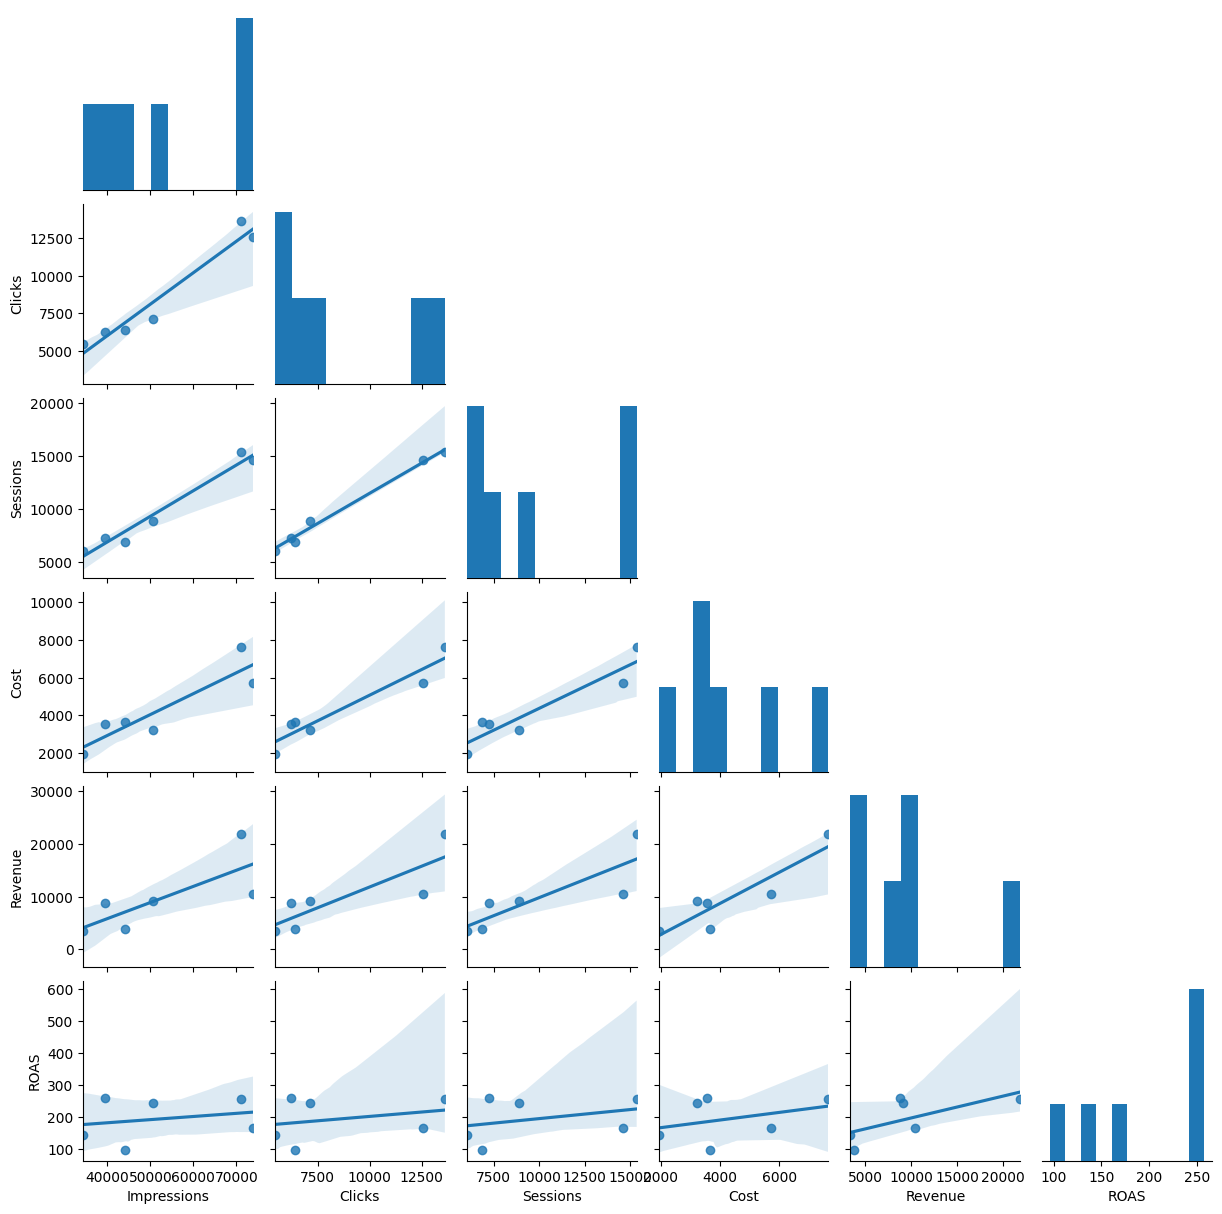

In [83]:
g=sns.pairplot(Smart_Shopping_Campaigns_M[['Impressions','Clicks','Sessions','Cost',"Revenue","ROAS"]],corner=True, height=2,kind="reg",palette="husl")

In [79]:
Y = Smart_Shopping_Campaigns_M['Revenue']
X = Smart_Shopping_Campaigns_M[['Cost']]

In [80]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 6.66267813e-01 -1.11605962e-03 -1.34766569e+00  1.74677241e+00]
Sabit değer (bias): 
 -26.373833064324913


In [81]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     17.82
Date:                Wed, 15 Jul 2020   Prob (F-statistic):             0.0135
Time:                        20:07:40   Log-Likelihood:                -55.737
No. Observations:                   6   AIC:                             115.5
Df Residuals:                       4   BIC:                             115.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3126.8453   3278.359     -0.954      0.394   -1.22e+04    5975.338
Cost           2.9575      0.701      4.221      0.013       1.012       4.903
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.924
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.846
Skew:                          -0.549   Prob(JB):                        0.655
Kurtosis:                       1.524   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

DSA_Campaigns


In [84]:
DSA_Campaigns = Daily_Cost5[(Daily_Cost5["Campaign"]=="DSA Campaigns")].reset_index()
DSA_Campaigns

,level_0,index,Campaign,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,DateTime,ROAS
0,69,100,DSA Campaigns,20200408,500.550,8504,599,0.070,0.836,558,0.733,2.260,1,107.160,0.002,2020-04-08,21.408
1,104,148,DSA Campaigns,20200312,396.480,8309,515,0.062,0.770,478,0.724,2.655,2,56.470,0.004,2020-03-12,14.243
2,137,187,DSA Campaigns,20200414,348.950,6738,483,0.072,0.722,478,0.703,3.251,2,175.510,0.004,2020-04-14,50.297
3,149,199,DSA Campaigns,20200205,334.660,8295,390,0.047,0.858,386,0.772,1.795,0,0.000,0.000,2020-02-05,0.000
4,151,202,DSA Campaigns,20200206,333.350,8537,408,0.048,0.817,380,0.797,1.589,0,0.000,0.000,2020-02-06,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2755,5140,DSA Campaigns,20200222,11.150,564,29,0.051,0.384,24,0.750,2.000,0,0.000,0.000,2020-02-22,0.000
170,2860,5294,DSA Campaigns,20200224,9.440,333,24,0.072,0.393,33,0.576,3.788,0,0.000,0.000,2020-02-24,0.000
171,2900,5353,DSA Campaigns,20200225,8.740,339,29,0.086,0.301,34,0.647,4.353,0,0.000,0.000,2020-02-25,0.000
172,3208,5759,DSA Campaigns,20200226,5.040,233,9,0.039,0.560,9,0.556,3.111,0,0.000,0.000,2020-02-26,0.000


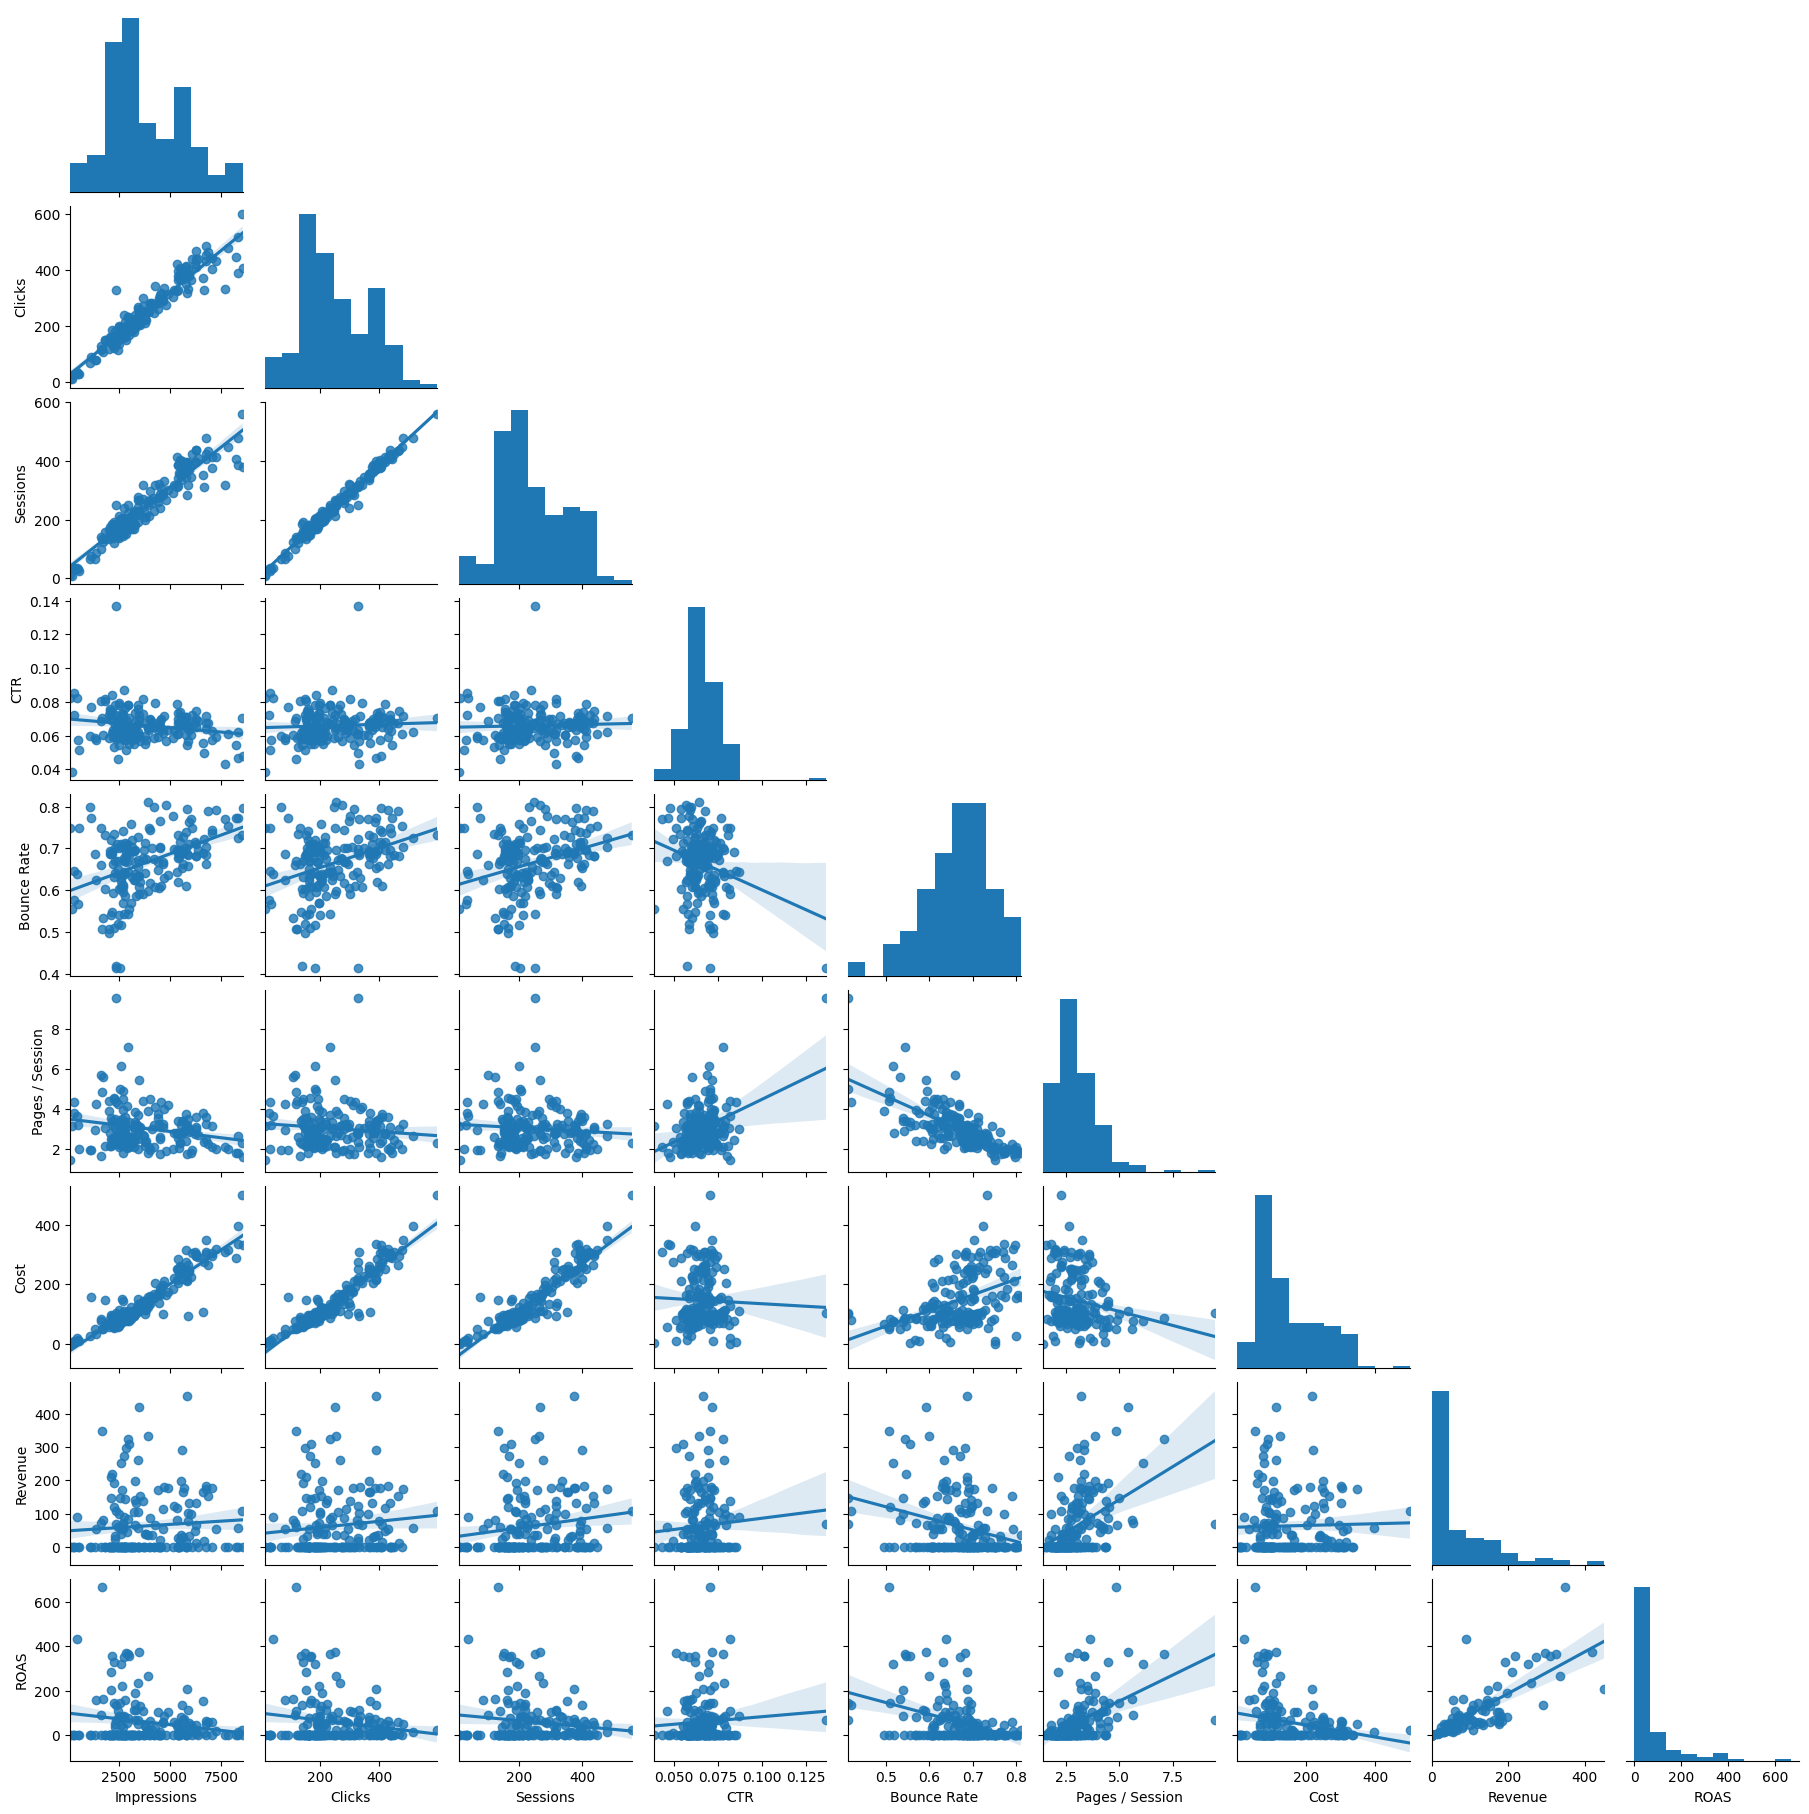

In [85]:
g=sns.pairplot(DSA_Campaigns[['Impressions','Clicks','Sessions',"CTR","Bounce Rate","Pages / Session",'Cost',"Revenue","ROAS"]],corner=True, height=2,kind="reg",palette="husl")

In [86]:
Y = DSA_Campaigns['Revenue']
X = DSA_Campaigns[['CPC','Cost','CTR']]

In [87]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-1.28857861e+02  1.63502904e-01  4.90966356e+02]
Sabit değer (bias): 
 79.65159335596833


In [89]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.072
Date:                Wed, 15 Jul 2020   Prob (F-statistic):              0.106
Time:                        20:35:21   Log-Likelihood:                -1030.4
No. Observations:                 174   AIC:                             2069.
Df Residuals:                     170   BIC:                             2081.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.6516     56.635      1.406      0.161     -32.147     191.451
CPC         -128.8579     56.802     -2.269      0.025    -240.985     -16.730
Cost           0.1635      0.097      1.692      0.092      -0.027       0.354
CTR          490.9664    708.111      0.693      0.489    -906.856    1888.789
==============================================================================
Omnibus:                       66.171   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.882
Skew:                           1.734   Prob(JB):                     2.84e-33
Kurtosis:                       5.942   Cond. No.                     1.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
# Create column for year and month
DSA_Campaigns["Order_YM"] = DSA_Campaigns["DateTime"].dt.strftime("%Y-%m")
DSA_Campaigns.head(5)

,level_0,index,Campaign,Date,Cost,Impressions,Clicks,CTR,CPC,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,DateTime,ROAS,Order_YM
0,69,100,DSA Campaigns,20200408,500.550,8504,599,0.070,0.836,558,0.733,2.260,1,107.160,0.002,2020-04-08,21.408,2020-04
1,104,148,DSA Campaigns,20200312,396.480,8309,515,0.062,0.770,478,0.724,2.655,2,56.470,0.004,2020-03-12,14.243,2020-03
2,137,187,DSA Campaigns,20200414,348.950,6738,483,0.072,0.722,478,0.703,3.251,2,175.510,0.004,2020-04-14,50.297,2020-04
3,149,199,DSA Campaigns,20200205,334.660,8295,390,0.047,0.858,386,0.772,1.795,0,0.000,0.000,2020-02-05,0.000,2020-02
4,151,202,DSA Campaigns,20200206,333.350,8537,408,0.048,0.817,380,0.797,1.589,0,0.000,0.000,2020-02-06,0.000,2020-02


In [91]:
DSA_Campaigns_M = DSA_Campaigns.groupby("Order_YM").agg({"Cost":"sum",
                                                            "Impressions":"sum",
                                                            "CTR":"mean",
                                                            "CPC":"mean",
                                                            "Clicks":"sum",
                                                            "Sessions":"sum",
                                                            "Bounce Rate":"mean",
                                                            "Pages / Session":"mean",
                                                            "Transactions":"sum",
                                                            "Revenue":"sum",
                                                            "Ecommerce Conversion Rate":"mean",
                                                            "ROAS":"mean"}).reset_index()
DSA_Campaigns_M.head()

,Order_YM,Cost,Impressions,CTR,CPC,Clicks,Sessions,Bounce Rate,Pages / Session,Transactions,Revenue,Ecommerce Conversion Rate,ROAS
0,2020-01,3431.710,103641,0.063,0.526,6417,6216,0.679,2.437,19,1182.110,0.003,37.728
1,2020-02,4067.890,104321,0.061,0.590,6092,5781,0.734,2.327,9,385.340,0.003,20.612
2,2020-03,6361.270,157943,0.065,0.606,10185,9827,0.685,3.139,57,2959.370,0.006,58.844
3,2020-04,6629.690,150180,0.068,0.631,10226,9878,0.677,3.046,24,1474.080,0.002,22.531
4,2020-05,2858.850,74556,0.076,0.559,5572,5613,0.639,3.573,47,2230.080,0.007,78.996


In [92]:
Y = DSA_Campaigns_M['Revenue']
X = DSA_Campaigns_M[['CPC','Cost','CTR']]

In [93]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.30507147e+04  9.06477330e-01  1.35805385e+05]
Sabit değer (bias): 
 7688.390767145824


In [95]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     1.384
Date:                Wed, 15 Jul 2020   Prob (F-statistic):              0.445
Time:                        20:54:02   Log-Likelihood:                -46.016
No. Observations:                   6   AIC:                             100.0
Df Residuals:                       2   BIC:                             99.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7688.3908   7653.448      1.005      0.421   -2.52e+04    4.06e+04
CPC        -3.305e+04   1.79e+04     -1.845      0.206    -1.1e+05     4.4e+04
Cost           0.9065      0.532      1.704      0.230      -1.382       3.195
CTR         1.358e+05   8.52e+04      1.594      0.252   -2.31e+05    5.02e+05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.231
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.404
Skew:                          -0.166   Prob(JB):                        0.817
Kurtosis:                       1.774   Cond. No.                     1.07e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""